In [1]:
from numpy import genfromtxt
import numpy as np

my_data = genfromtxt('E:/diabaties.csv', delimiter=',')

In [2]:
my_data

array([[    nan,     nan,     nan, ...,     nan,     nan,     nan],
       [  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [3]:
X,Y = my_data[1: ,:-1], my_data[1: ,-1:] #striping data and output from my_data

In [4]:
print(X.shape)
print(Y.shape)

(768, 8)
(768, 1)


In [5]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [6]:
m = X.shape[0]
def propagate(W, b, X, Y):
    
    #forward propagation
    A = sigmoid(np.dot(X, W) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
    print(cost)
    
    #backward propagation
    dw = (1 / m) * np.dot(X.T, (A - Y))
    db = (1 / m) * np.sum(A - Y)
    return(dw, db, cost)

In [7]:
def optimizer(W,b,X,Y,number_of_iterration,learning_rate):
    for i in range(number_of_iterration):
        dw, db, cost = propagate(W,b,X,Y)
        W = W - learning_rate*dw
        b = b - learning_rate*db
    return(W, b)
    

In [18]:
W = np.random.randn(X.shape[1],1)*0.01
b = 0
#W,b = optimizer(W, b, X, Y, 100, 0.05) #The problem is with the learning rate which is too high for this dataset


# This is a simple swallow neural network

In [19]:
#correct algo for the above

from numpy import genfromtxt
import numpy as np


my_data = genfromtxt('E:/diabaties.csv', delimiter=',')

X,Y = my_data[1: ,:-1], my_data[1: ,-1:] #striping data and output from my_data

def sigmoid(x):
    return (1/(1+np.exp(-x)))

m = X.shape[0]
def propagate(W, b, X, Y):

    #forward propagation
    A = sigmoid(np.dot(X, W) + b)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))

    #backward propagation
    dw = (1 / m) * np.dot(X.T, (A - Y))
    db = (1 / m) * np.sum(A - Y)
    return(dw, db, cost)

def optimizer(W,b,X,Y,number_of_iterration,learning_rate):
    for i in range(number_of_iterration):
        dw, db, cost = propagate(W,b,X,Y)
        W = W - learning_rate*dw
        b = b - learning_rate*db
    print(cost)
    return(W, b)

W = np.random.normal(loc=0, scale=0.01, size=(X.shape[1], 1))  # Drawing random initialization from gaussian
b = 0
W,b = optimizer(W, b, X, Y, 100000,0.0001) 

0.5958515859025005


# Making a model with one hidden layer

In [14]:
from numpy import genfromtxt
import numpy as np

def sigmoid(x):
    return (1/(1+np.exp(-x)))

def propagate(X, W1, W2, b1, b2, Y):
    
    m= 768
    
    #forward propagation
    
    Z1 = np.dot(W1, X.T) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cost = - np.sum(np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))) / m
    
    
    #backward propagation
    
    dZ2= A2.T - Y
    dW2 = (1 / m) * np.dot(A1, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(dZ2, W2), 1 - np.power(A1.T, 2))
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return(dW1,dW2,db1,db2,cost)
    
def optimizer(W1,W2,b1,b2,X,Y,number_of_iterration,learning_rate):
    for i in range(number_of_iterration):
        print("test",i)
        dw1, dw2, db1, db2, cost = propagate(X, W1, W2, b1, b2, Y)
        W1 = W1 - learning_rate*dw1.T
        W2 = W2 - learning_rate*dw2.T
        b1 = b1 - learning_rate*db1.T
        b2 = b2 - learning_rate*db2.T
        if(i%1000==0):
            print(cost)


my_data = genfromtxt('E:/diabaties.csv', delimiter=',')

X,Y = my_data[1: ,:-1], my_data[1: ,-1:] #striping data and output from my_data
n_x = X.shape[1] #input layer size
n_h = 4 #hidden layer size
n_y = 1 #output layer size



W1 = np.random.normal(loc=0, scale=0.01, size=(n_h, n_x)) 
b1 = np.zeros(shape=(n_h, 1))
W2 = np.random.normal(loc=0, scale=0.01, size=(n_y, n_h)) 
b2 = np.zeros(shape=(n_y, 1))


optimizer(W1,W2,b1,b2,X,Y,100000,0.0001)

test 0
533.986873385398
test 1
test 2
test 3
test 4
test 5
test 6
test 7
test 8
test 9
test 10
test 11
test 12
test 13
test 14
test 15
test 16
test 17
test 18
test 19
test 20
test 21
test 22
test 23
test 24
test 25
test 26
test 27
test 28
test 29
test 30
test 31
test 32
test 33
test 34
test 35
test 36
test 37
test 38
test 39
test 40
test 41
test 42
test 43
test 44
test 45
test 46
test 47
test 48
test 49
test 50
test 51
test 52
test 53
test 54
test 55
test 56
test 57
test 58
test 59
test 60
test 61
test 62
test 63
test 64
test 65
test 66
test 67
test 68
test 69
test 70
test 71
test 72
test 73
test 74
test 75
test 76
test 77
test 78
test 79
test 80
test 81
test 82
test 83
test 84
test 85
test 86
test 87
test 88
test 89
test 90
test 91
test 92
test 93
test 94
test 95
test 96
test 97
test 98
test 99
test 100
test 101
test 102
test 103
test 104
test 105
test 106
test 107
test 108
test 109
test 110
test 111
test 112
test 113
test 114
test 115
test 116
test 117
test 118
test 119
test 120
test

KeyboardInterrupt: 

In [2]:
X.shape

(768, 8)

In [4]:
 W1.shape

(4, 8)

In [5]:
W2.shape

(1, 4)

In [6]:
Y.shape

(768, 1)

# Building a layer neural network

In [22]:
from numpy import genfromtxt
import numpy as np

def sigmoid(x):
    return (1/(1+np.exp(-x)))

def relu(x):
    return(np.maximum(x,0))
    
def relu_back(x):
    if(x>0):
        return 1
    else:
        return 0
    
vf = np.vectorize(relu_back)

def propagate(X, W1, W2, b1, b2, Y):
    
    m= 768
    
    #forward propagation
    
    Z1 = np.dot(W1, X.T) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    cost = - np.sum(np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))) / m
    
    
    #backward propagation
    
    dZ2= A2.T - Y
    dW2 = (1 / m) * np.dot(A1, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(dZ2, W2), vf(A1.T))
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return(dW1,dW2,db1,db2,cost)
    
def optimizer(W1,W2,b1,b2,X,Y,number_of_iterration,learning_rate):
    for i in range(number_of_iterration):
        dw1, dw2, db1, db2, cost = propagate(X, W1, W2, b1, b2, Y)
        W1 = W1 - learning_rate*dw1.T
        W2 = W2 - learning_rate*dw2.T
        b1 = b1 - learning_rate*db1.T
        b2 = b2 - learning_rate*db2.T
        if(i%1000==0):
            print(cost)


my_data = genfromtxt('E:/diabaties.csv', delimiter=',')

X,Y = my_data[1: ,:-1], my_data[1: ,-1:] #striping data and output from my_data
n_x = X.shape[1] #input layer size
n_h = 4 #hidden layer size
n_y = 1 #output layer size



W1 = np.random.normal(loc=0, scale=.1, size=(n_h, n_x)) 
b1 = np.zeros(shape=(n_h, 1))
W2 = np.random.normal(loc=0, scale=.1, size=(n_y, n_h)) 
b2 = np.zeros(shape=(n_y, 1))


optimizer(W1,W2,b1,b2,X,Y,100000,0.0001)

1541.5173007610726
508.4925741298952
507.9633262962996


KeyboardInterrupt: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

ModuleNotFoundError: No module named 'reg_utils'

# Digit classifier tensor flow

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import time

name = "cnn-{}".format(int(time.time()))
mnist = tf.keras.datasets.mnist
tensorboard = TensorBoard(log_dir='logs/{}'.format(name))

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, epochs=100, validation_data=(x_test, y_test) ,callbacks = [tensorboard])

Epoch 1/100
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4864 - accuracy: 0.8641 - val_loss: 0.1492 - val_accuracy: 0.9543
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1328 - accuracy: 0.9597 - val_loss: 0.1095 - val_accuracy: 0.9649
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0839 - accuracy: 0.9742 - val_loss: 0.1033 - val_accuracy: 0.9671
Epoch 4/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0922 - val_accuracy: 0.9727
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0480 - accuracy: 0.9844 - val_loss: 0.0845 - val_accuracy: 0.9740
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.1026 - val_accuracy: 0.9681
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.1019 - val_ac

In [39]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                368650    
_________________________________________________________________
activation_2 (Activation)    (None, 10)              

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import time

name = "cnn-{}".format(int(time.time()))
mnist = tf.keras.datasets.mnist

tensorboard = TensorBoard(log_dir='logs/{}'.format(name))

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

print(x_train.shape)

model = Sequential()
model.add(Conv2D(16, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))

model.add(Conv2D(16, (3,3)))
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, epochs=100, validation_data=(x_test, y_test) ,callbacks = [tensorboard])

(60000, 28, 28, 1)
Epoch 1/100
1875/1875 [==============================] - 14s 5ms/step - loss: 0.3661 - accuracy: 0.8928 - val_loss: 0.0739 - val_accuracy: 0.9773
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0711 - accuracy: 0.9782 - val_loss: 0.0608 - val_accuracy: 0.9806
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - accuracy: 0.9864 - val_loss: 0.0589 - val_accuracy: 0.9826
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0326 - accuracy: 0.9893 - val_loss: 0.0517 - val_accuracy: 0.9851
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0602 - val_accuracy: 0.9836
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0169 - accuracy: 0.9940 - val_loss: 0.0619 - val_accuracy: 0.9843
Epoch 7/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0113 - accuracy: 0.9965 - val_l

In [38]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0461 - accuracy: 0.9869
0.04609332233667374 0.9868999719619751


In [19]:
model.save('digit_model.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: digit_model.model\assets


In [21]:
new_model = tf.keras.models.load_model('digit_model.model')

In [23]:
pridict = new_model.predict([x_test])

In [25]:
import numpy as np
print(np.argmax(pridict[0]))

7


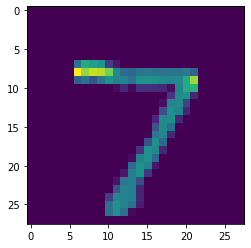

In [26]:
plt.imshow(x_test[0])

# Cat and dog

In [8]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf

In [2]:
Data_dir = "E:/cat_dog/train"
folders = ["cat", "dog"]

training_data = []
def create_data():
    for folder in folders:
        path = os.path.join(Data_dir, folder)
        label = 0 if folder == "dog" else 1
        
        for images in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
                opt_img_arr = cv2.resize(img_arr, (50, 50))
                training_data.append([opt_img_arr, label])
            except:
                pass
create_data()
print(len(training_data))

25000


In [3]:
random.shuffle(training_data)

In [4]:
X = []
Y = []

for data, label in training_data:
    X.append(data)
    Y.append(label)

X = np.array(X).reshape(-1, 50, 50, 1) 
Y = np.array(Y)

X = X/255.0

In [5]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(256, (3,3), input_shape = X.shape[1:]))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(tf.keras.layers.Conv2D(256, (3,3)))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation("sigmoid"))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X, Y, batch_size = 32, epochs=3)

Epoch 1/3
782/782 [==============================] - 277s 354ms/step - loss: 0.6383 - accuracy: 0.6376
Epoch 2/3
782/782 [==============================] - 277s 355ms/step - loss: 0.5550 - accuracy: 0.7186
Epoch 3/3
782/782 [==============================] - 277s 354ms/step - loss: 0.5104 - accuracy: 0.7496


In [6]:
model.save('catdog_model.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: catdog_model.model\assets


In [9]:
new_model = tf.keras.models.load_model('catdog_model.model')
pridict = new_model.predict([X])

NameError: name 'X' is not defined

In [31]:
print((np.round(pridict[2])))

[1.]


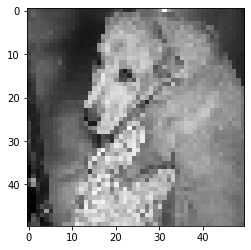

In [28]:
plt.imshow(X[2].reshape(50,50), cmap="gray")
plt.show()

In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

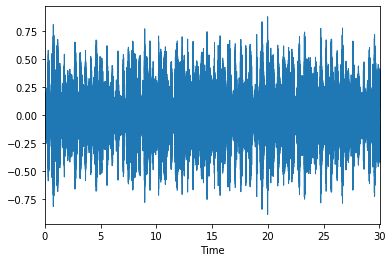

In [2]:
files = "Downloads/blues.00000.wav"
signal,sr = librosa.load(files, sr = 22050)
librosa.display.waveplot(signal, sr = sr)
plt.show()

In [4]:
fft = np.fft.fft(signal) #fourier transformation of signal
magnitude = np.abs(fft) 
frequency = np.linspace(0, sr, len(magnitude)) #distribute into 0 to 22050 evenly spaced

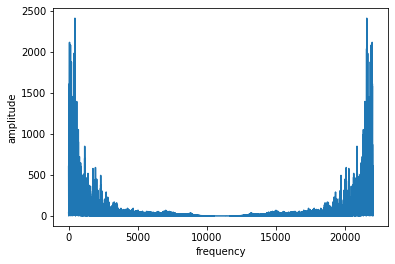

In [5]:
plt.plot(frequency, magnitude)
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.show()

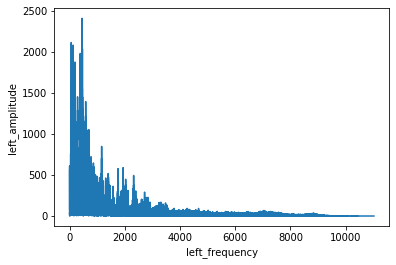

In [6]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]
plt.plot(left_frequency, left_magnitude)
plt.xlabel("left_frequency")
plt.ylabel("left_amplitude")
plt.show()

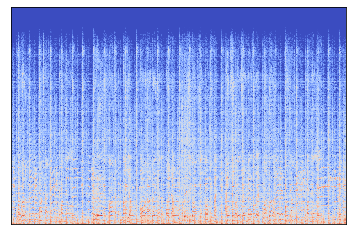

In [7]:
#making spectogram
n_fft = 2048
hop_length = 512

stft =  librosa.core.stft(signal, hop_length = hop_length, n_fft=n_fft)
spectogram = np.abs(stft)
log_spectrum = librosa.amplitude_to_db(spectogram)
librosa.display.specshow(log_spectrum, sr=sr, hop_length=hop_length)
plt.show()

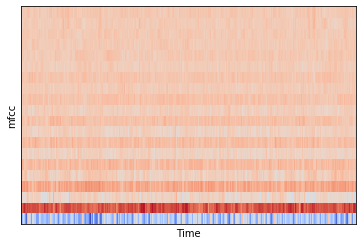

In [8]:
mfcc = librosa.feature.mfcc(signal, n_fft=n_fft, hop_length = hop_length)
librosa.display.specshow(mfcc, sr=sr, hop_length = hop_length)
plt.xlabel("Time")
plt.ylabel("mfcc")
plt.show()

In [9]:
print(mfcc.shape)

(20, 1293)


In [11]:
print(signal.shape)

(661794,)


In [12]:
print(sr)

22050


# 

In [15]:
import numpy as np
from sklearn.cluster import MeanShift as ms
from sklearn.datasets.samples_generator import make_blobs

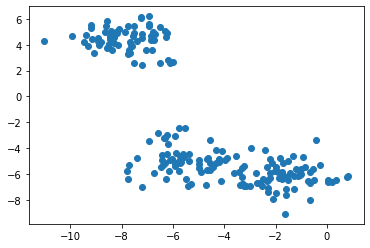

In [24]:
X, _ = make_blobs(n_samples = 200, cluster_std = 1)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [21]:
from sklearn.cluster import KMeans
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

(70000, 28, 28)
(70000, 784)


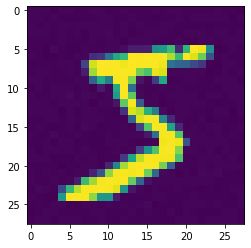

In [17]:
#inputing image
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
print(x.shape)
x = x.reshape(x.shape[0],-1)
print(x.shape)

x = np.divide(x, 255)

noise_factor = 1
x_train_noise = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
plt.imshow(x_train_noise[0].reshape(28,28))

# open eye close eye classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from tqdm import tqdm
from random import shuffle
from tensorflow.keras.callbacks import TensorBoard
import time

In [36]:
Data_dir = "E:/research"
folders = ["eye_free_close", "eye_free_open"]
IMG_SIZE = 50

training_data = []
def create_data():
    for folder in folders:
        path = os.path.join(Data_dir, folder)
        label = [1,0] if folder == "eye_free_close" else [0,1] #[close, open]
        
        for images in tqdm(os.listdir(path)):
            try:
                img_arr = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
                opt_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                training_data.append([np.array(opt_img_arr), np.array(label)])
            except:
                pass
    shuffle(training_data)
    np.save('free_eye_data.npy', training_data)
    return training_data

In [37]:
data = create_data()

100%|████████████████████████████████████████████████████████████████████████████| 3814/3814 [00:01<00:00, 2043.77it/s]


In [38]:
train = data[:-500]
test = data[-500:] 
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = np.array([i[1] for i in train])
X_TEST = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y_TEST = np.array([i[1] for i in test])

In [39]:
X = X/255.0
Y = Y/255.0
X_TEST = X_TEST/255.0
Y_TEST = Y_TEST/255.0

In [64]:
name = "cnn-eye-final-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(name))

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(256, (3,3), input_shape = [IMG_SIZE, IMG_SIZE, 1], activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Activation("softmax"))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X, Y, batch_size = 32,validation_data=(X_TEST, Y_TEST) ,epochs=20,callbacks = [tensorboard])

Epoch 1/20
263/263 [==============================] - 10s 37ms/step - loss: 0.0503 - accuracy: 0.5894 - val_loss: 0.0135 - val_accuracy: 0.8740
Epoch 2/20
263/263 [==============================] - 8s 31ms/step - loss: 0.0135 - accuracy: 0.8818 - val_loss: 0.0134 - val_accuracy: 0.8980
Epoch 3/20
263/263 [==============================] - 8s 31ms/step - loss: 0.0134 - accuracy: 0.9215 - val_loss: 0.0133 - val_accuracy: 0.9040
Epoch 4/20
263/263 [==============================] - 8s 31ms/step - loss: 0.0133 - accuracy: 0.9417 - val_loss: 0.0132 - val_accuracy: 0.9500
Epoch 5/20
263/263 [==============================] - 8s 31ms/step - loss: 0.0132 - accuracy: 0.9547 - val_loss: 0.0132 - val_accuracy: 0.9740
Epoch 6/20
263/263 [==============================] - 8s 31ms/step - loss: 0.0132 - accuracy: 0.9602 - val_loss: 0.0132 - val_accuracy: 0.9760
Epoch 7/20
263/263 [==============================] - 8s 31ms/step - loss: 0.0132 - accuracy: 0.9615 - val_loss: 0.0131 - val_accuracy: 0.972

In [26]:
model.save('eye01.model')

INFO:tensorflow:Assets written to: eye01.model\assets


In [41]:

model = tf.keras.models.load_model('eye01.model')

In [42]:
pridict = model.predict([X_TEST])
pridict[:10]

array([[0.00915022, 0.99084985],
       [0.99603647, 0.00396355],
       [0.9769414 , 0.02305861],
       [0.9974087 , 0.00259132],
       [0.0297265 , 0.9702735 ],
       [0.01353175, 0.9864682 ],
       [0.01532861, 0.9846714 ],
       [0.9790092 , 0.02099085],
       [0.9984176 , 0.00158236],
       [0.98578787, 0.0142122 ]], dtype=float32)

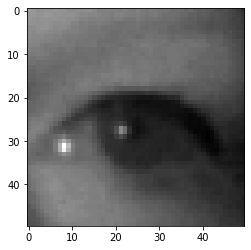

close probability:0.92%


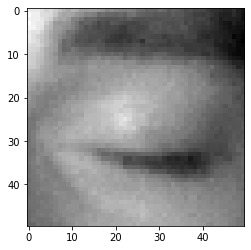

close probability:99.60%


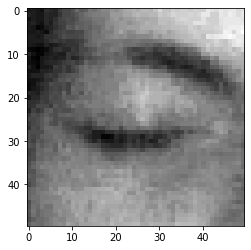

close probability:97.69%


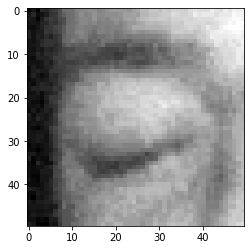

close probability:99.74%


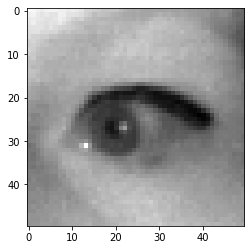

close probability:2.97%


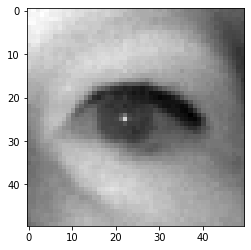

close probability:1.35%


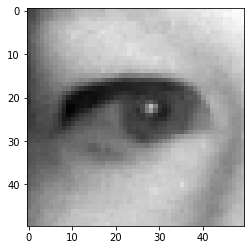

close probability:1.53%


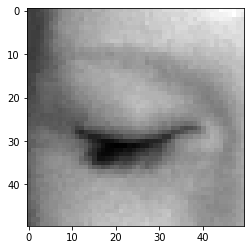

close probability:97.90%


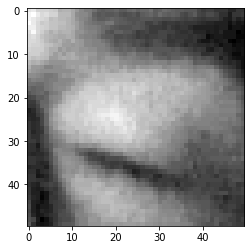

close probability:99.84%


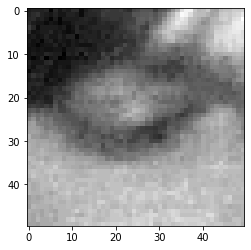

close probability:98.58%


In [49]:
i = 0
for i in range(10):
    plt.imshow(X_TEST[i], cmap = 'gray')
    plt.show()
    print('close probability:{:.2f}%'.format(pridict[i][0] * 100))

close


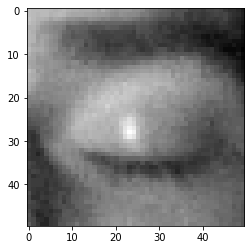

open


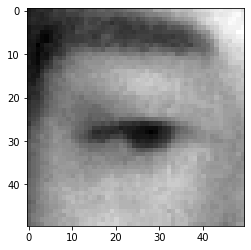

close


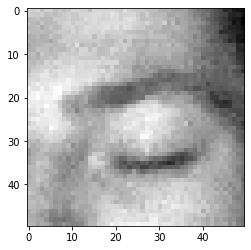

close


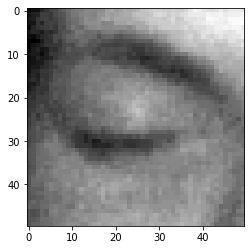

open


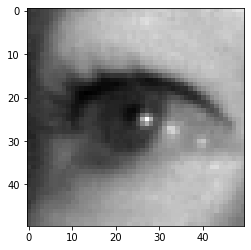

close


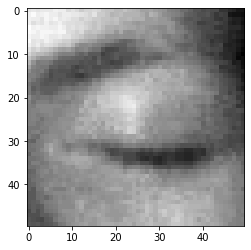

close


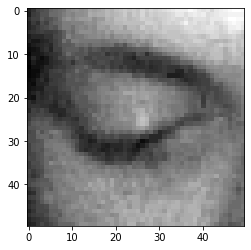

close


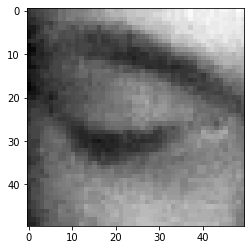

close


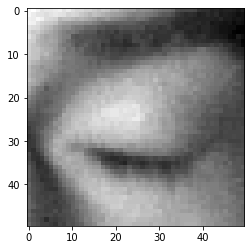

open


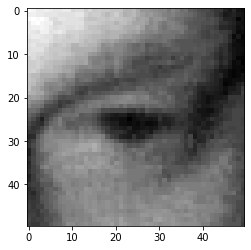

open


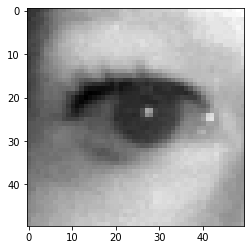

open


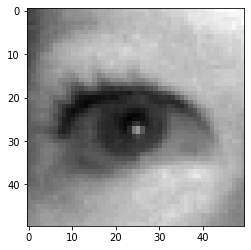

close


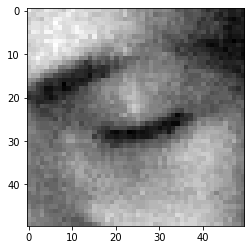

open


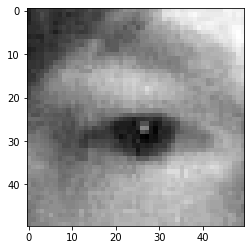

open


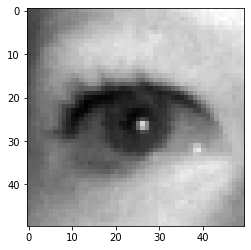

close


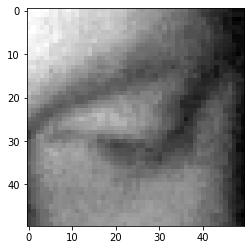

close


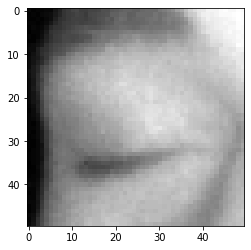

close


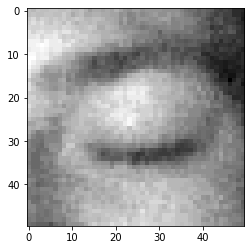

close


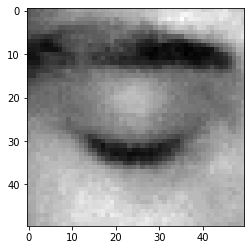

open


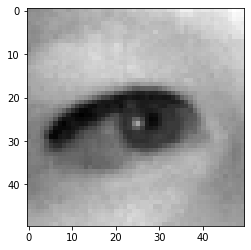

close


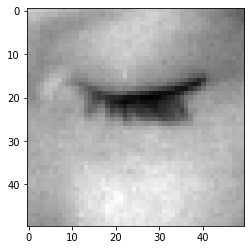

close


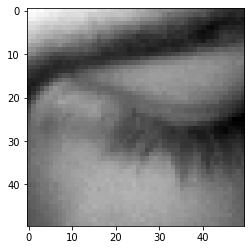

close


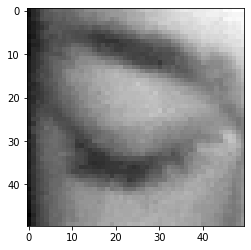

close


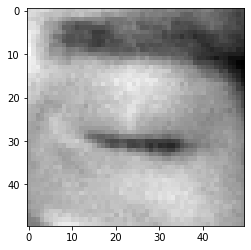

open


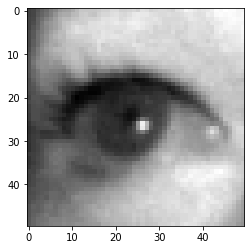

open


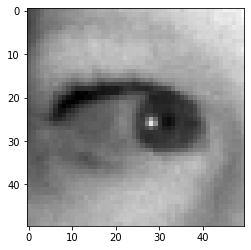

close


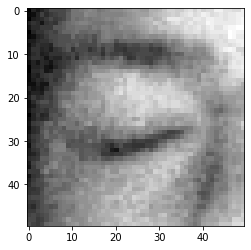

open


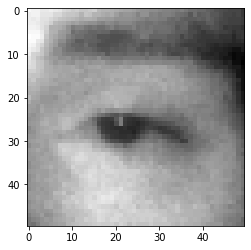

open


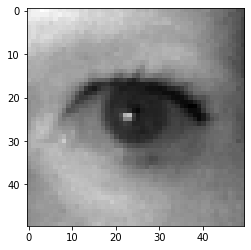

close


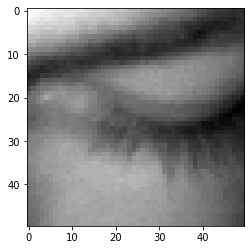

close


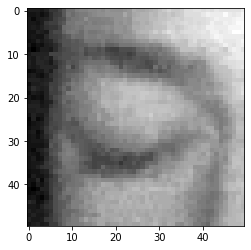

close


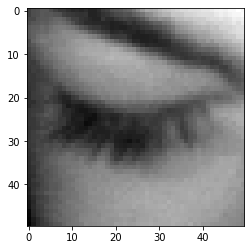

close


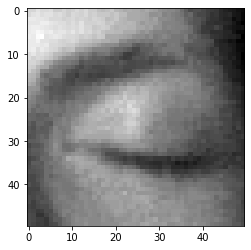

close


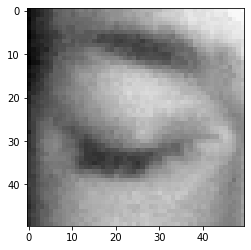

open


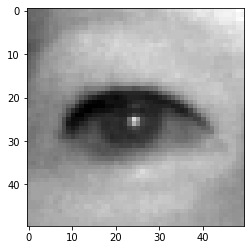

close


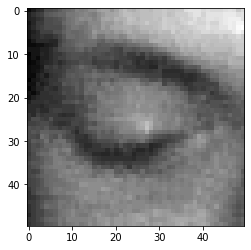

open


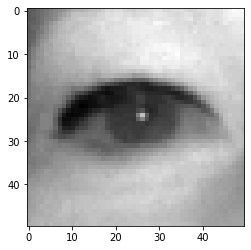

close


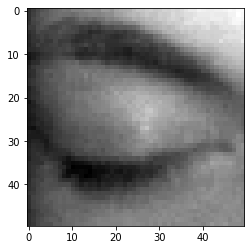

open


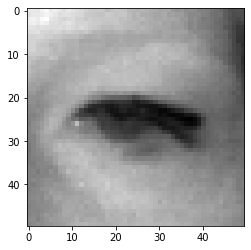

close


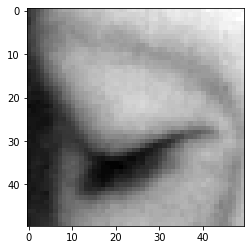

close


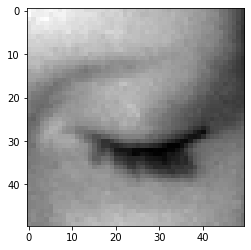

close


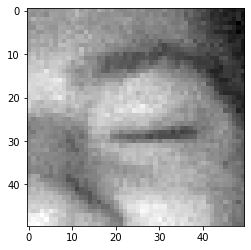

open


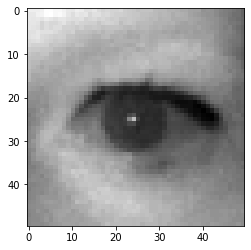

close


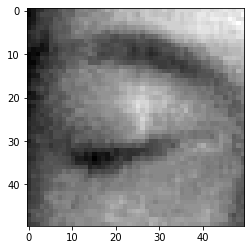

open


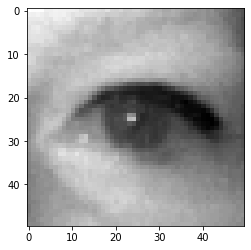

open


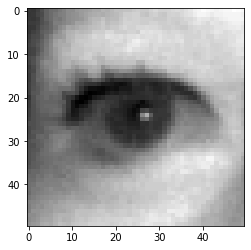

open


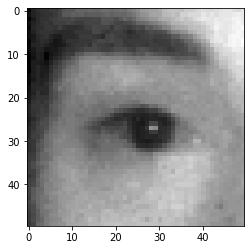

close


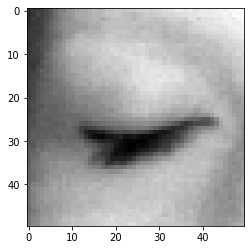

open


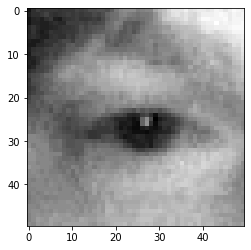

open


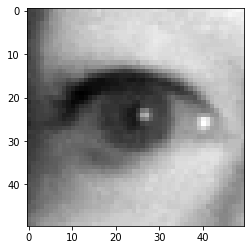

close


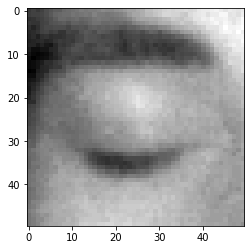

close


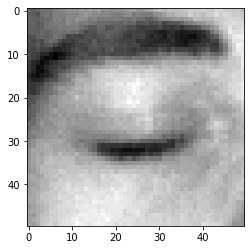

open


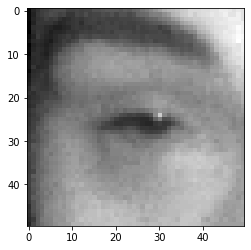

close


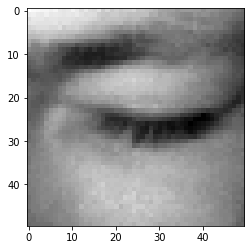

open


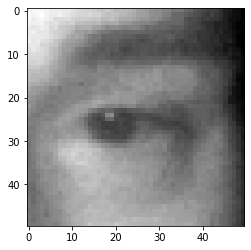

open


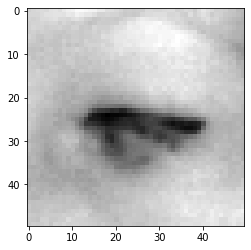

open


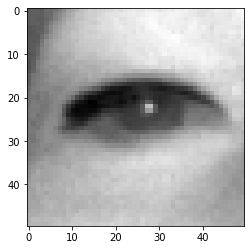

close


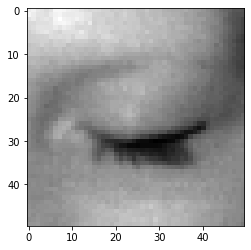

open


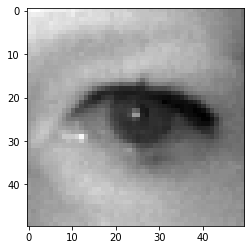

close


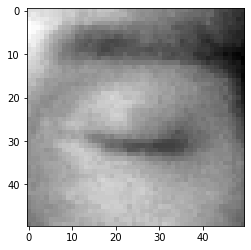

open


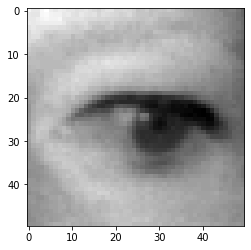

open


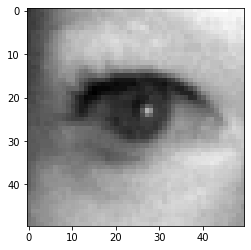

close


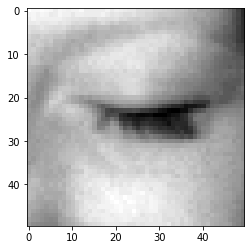

close


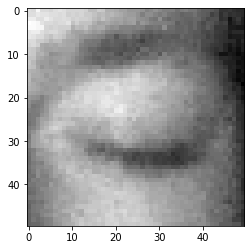

open


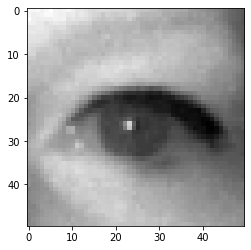

close


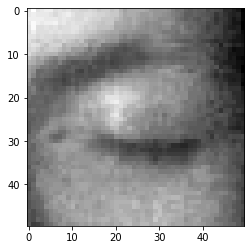

open


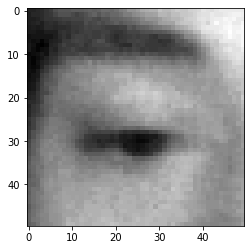

open


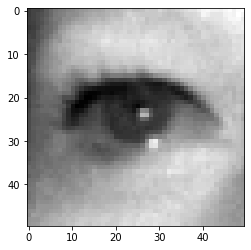

close


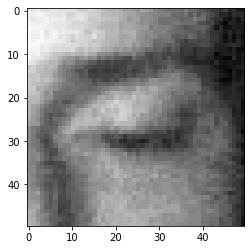

close


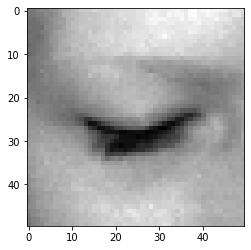

open


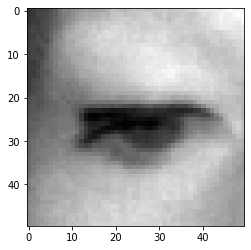

close


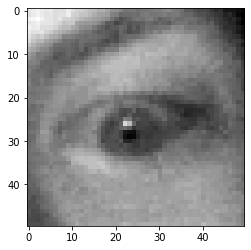

close


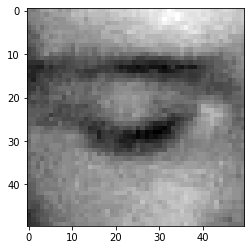

close


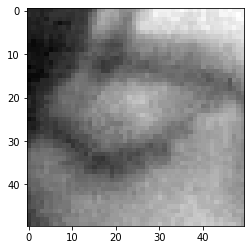

open


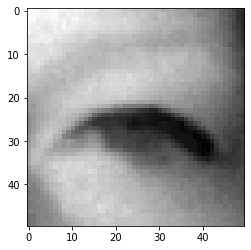

close


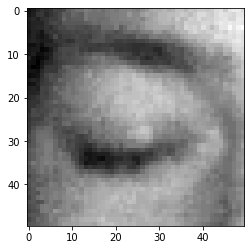

close


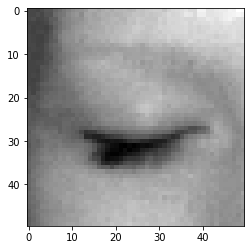

open


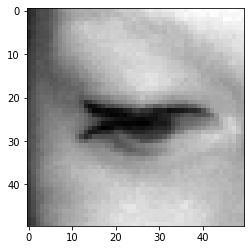

open


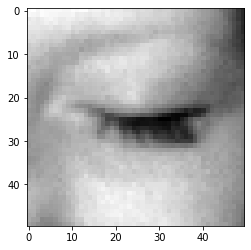

close


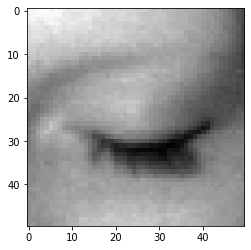

open


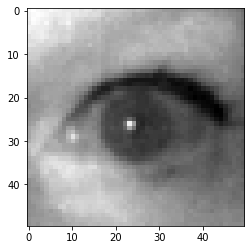

close


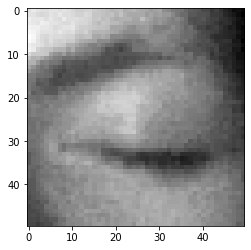

close


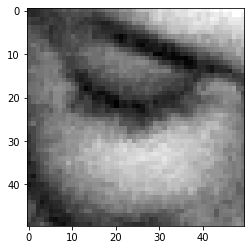

close


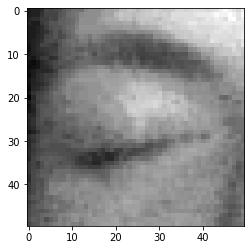

close


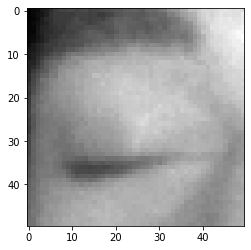

open


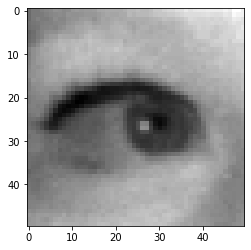

close


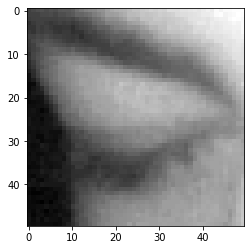

close


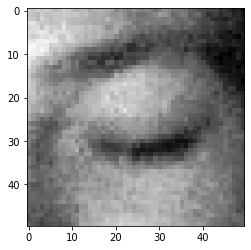

open


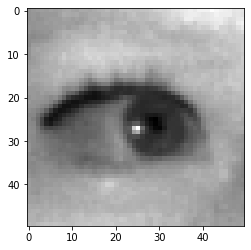

close


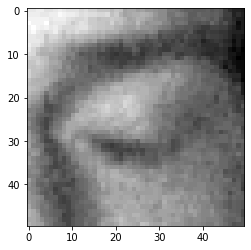

close


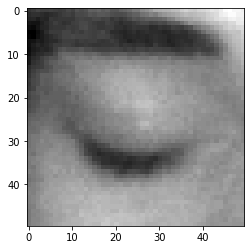

close


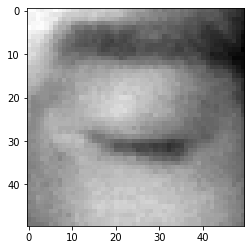

open


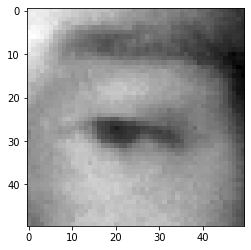

close


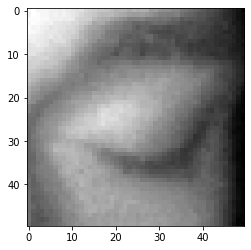

close


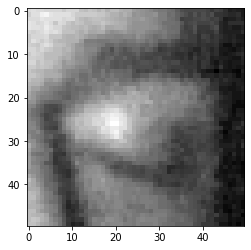

close


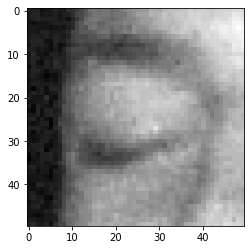

close


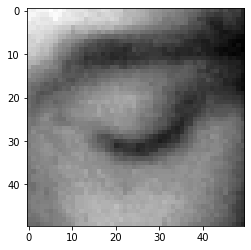

open


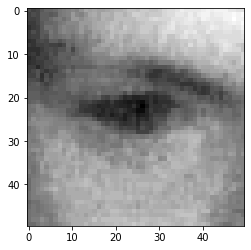

open


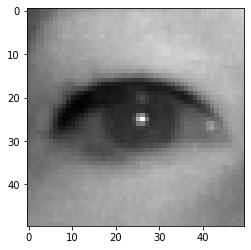

close


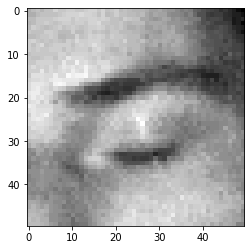

In [29]:
import numpy as np

for i in range(0,100):
    print("open"if(np.argmax(pridict[i]) == 1)else"close")
    plt.imshow(X_TEST[i].reshape(50,50), cmap = 'gray')
    plt.show()

In [52]:
face_cascade = cv2.CascadeClassifier('E:/research/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('E:/research/haarcascade_eye.xml')
print(X_TEST[i].shape)

(50, 50, 1)


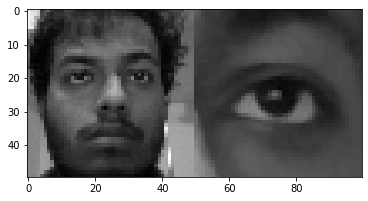

open


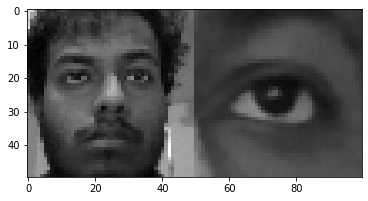

open


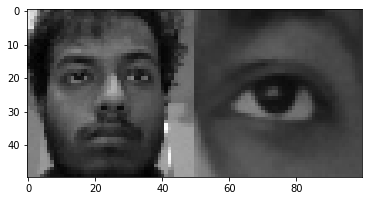

open


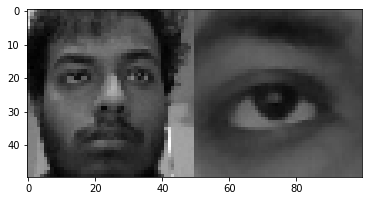

open


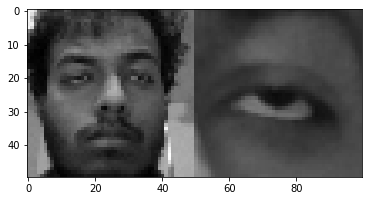

close


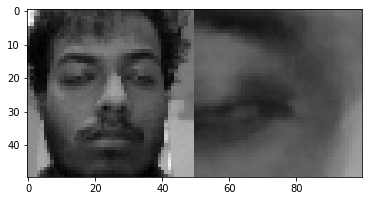

close


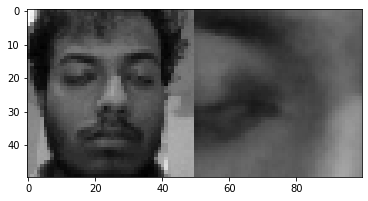

close


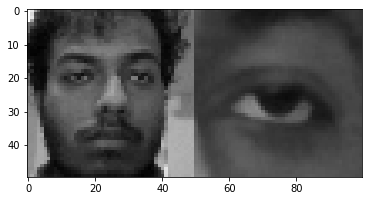

open


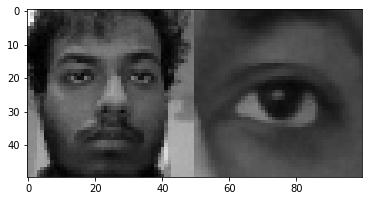

open


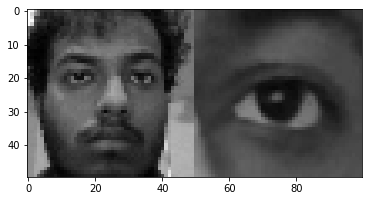

open


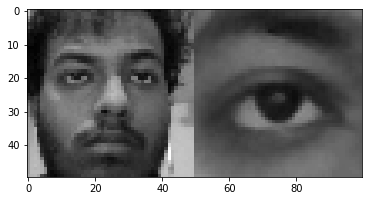

open


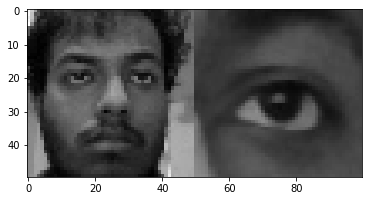

open


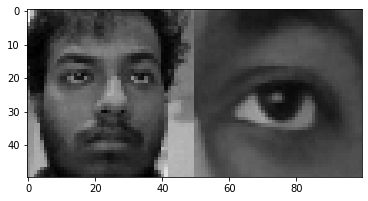

open


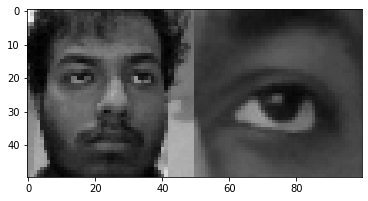

open


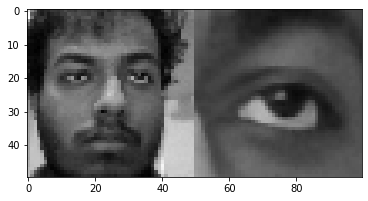

open


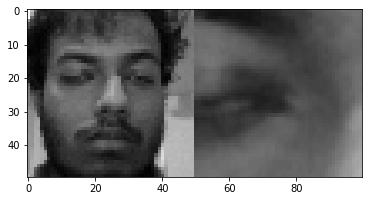

close


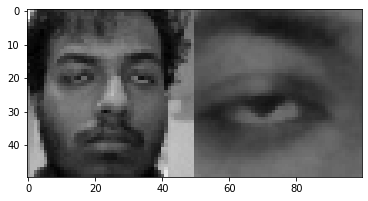

close


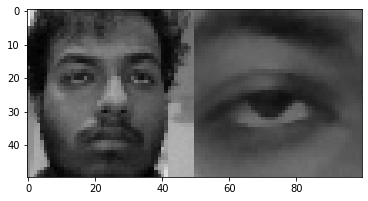

close


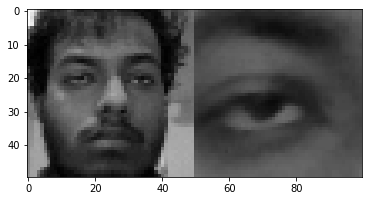

close


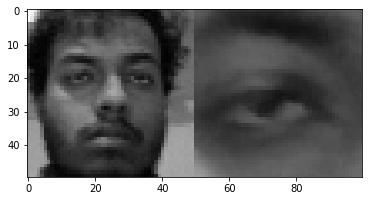

close


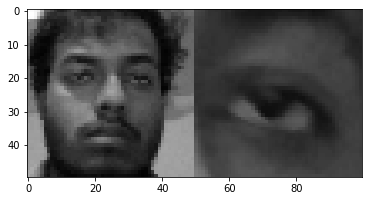

close


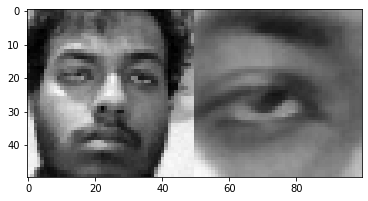

open


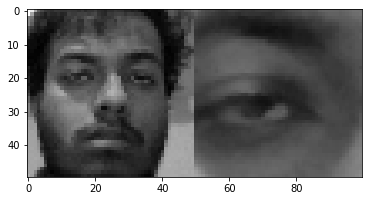

close


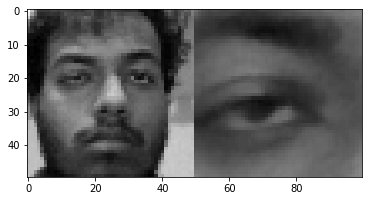

close


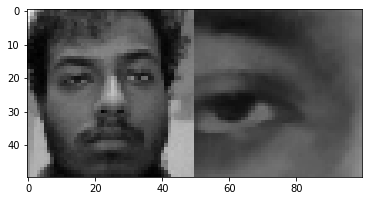

close


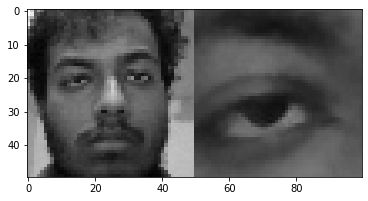

close


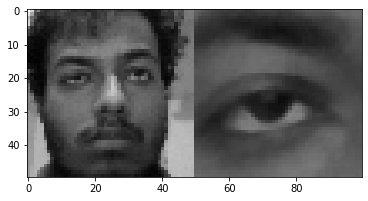

close


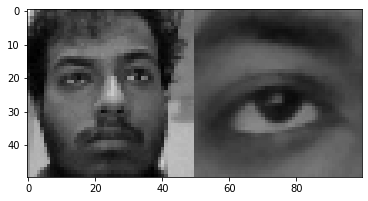

open


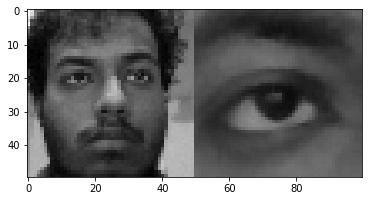

open


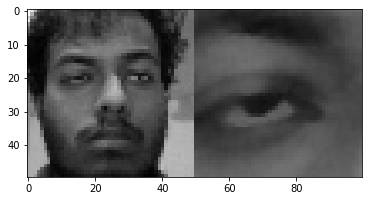

close


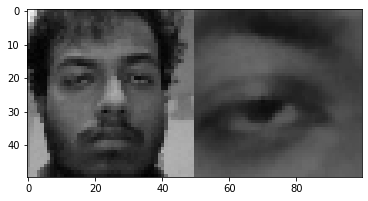

close


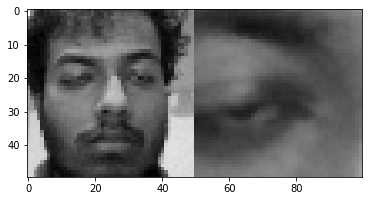

close


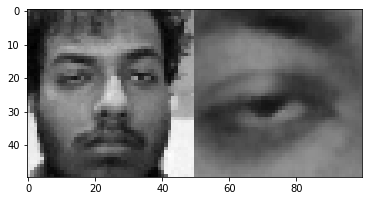

close


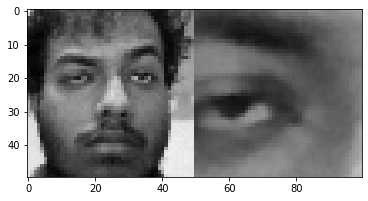

close


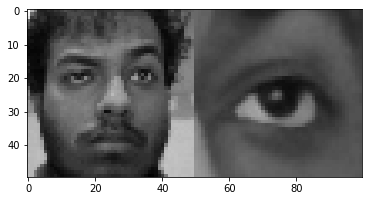

open


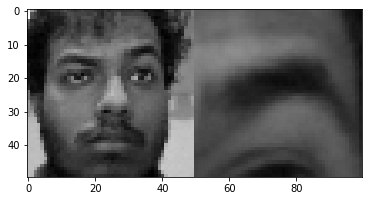

open


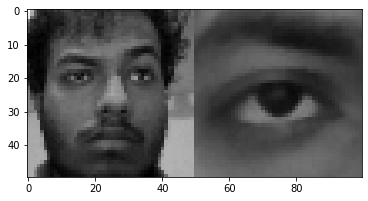

close


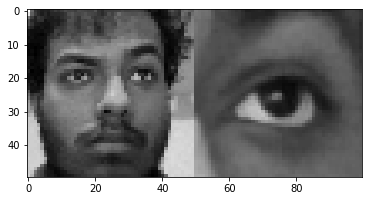

open


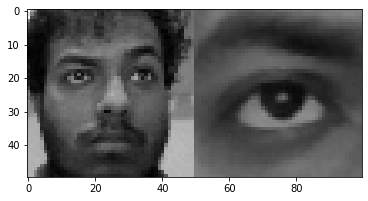

close


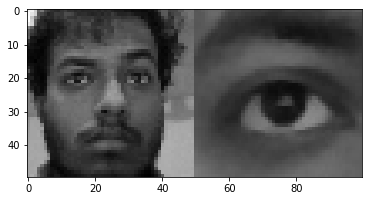

open


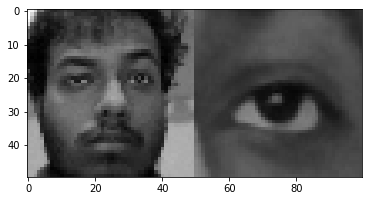

open


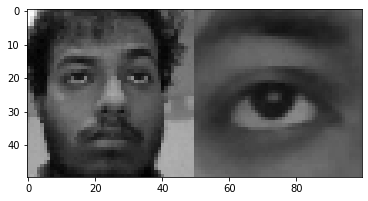

open


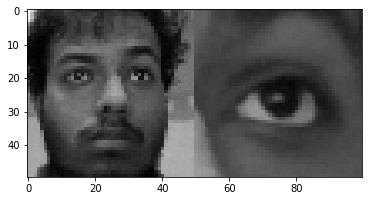

open


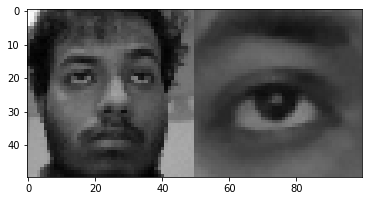

open


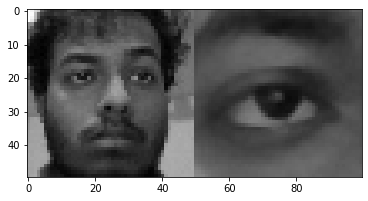

open


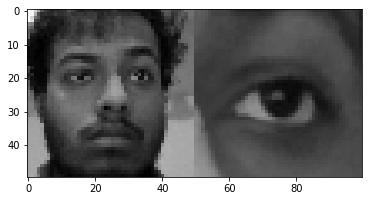

open


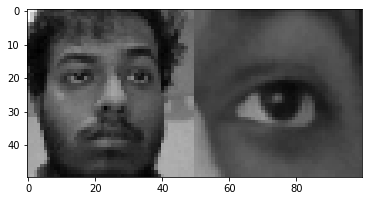

open


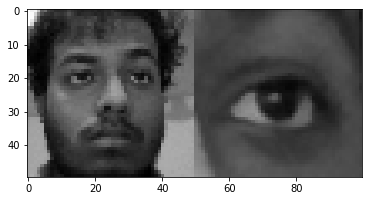

open


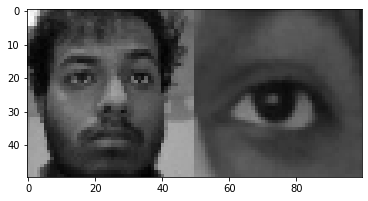

open


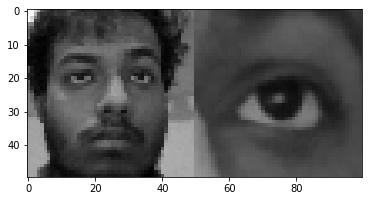

open


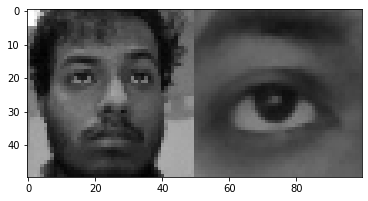

open


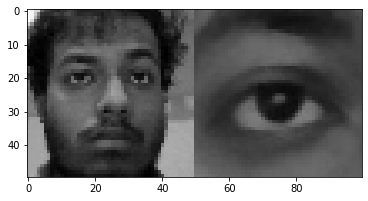

open


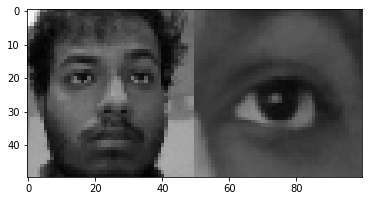

open


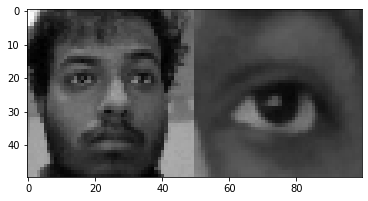

open


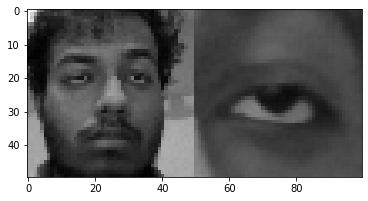

close


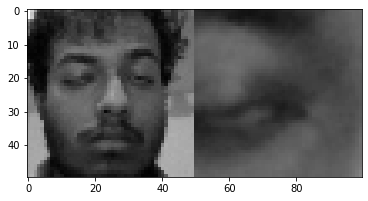

close


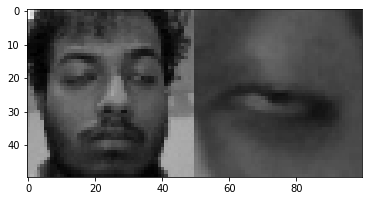

close


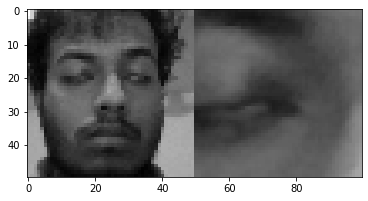

close


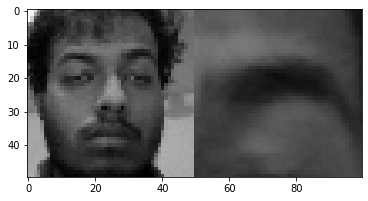

open


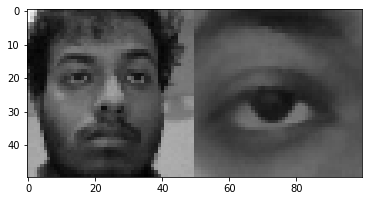

open


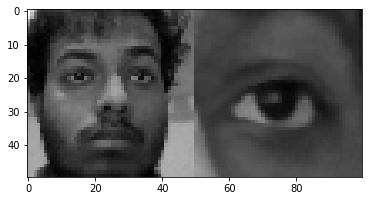

open


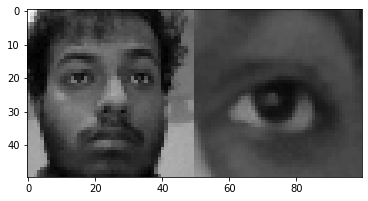

open


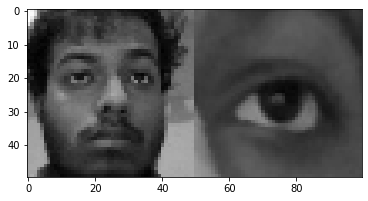

open


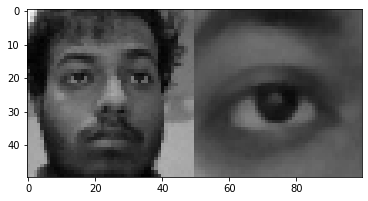

open


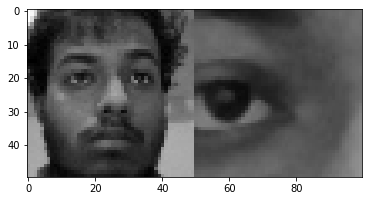

open


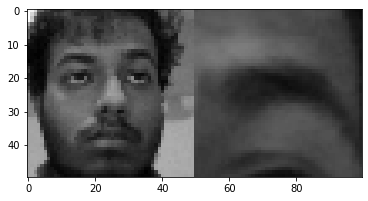

open


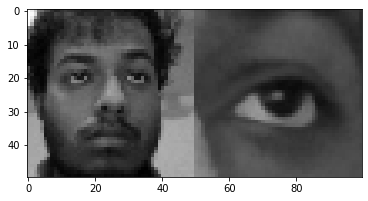

open


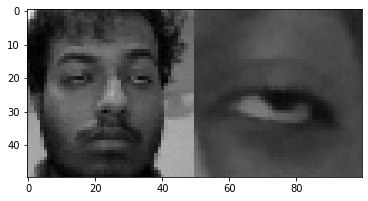

close


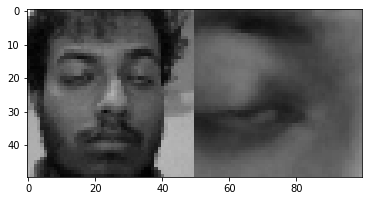

close


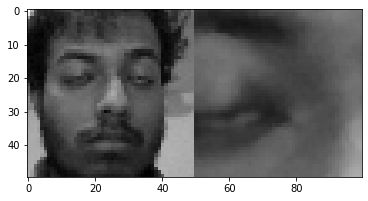

close


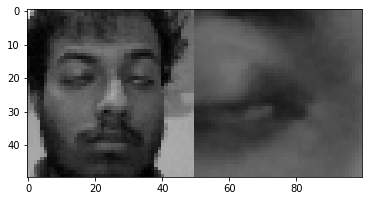

close


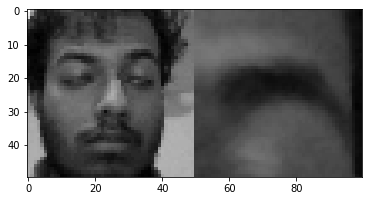

open


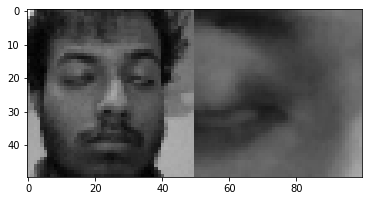

close


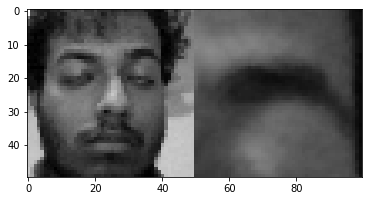

open


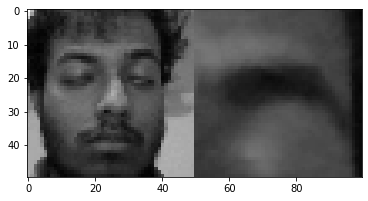

open


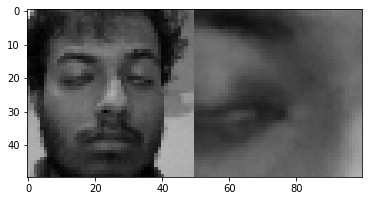

close


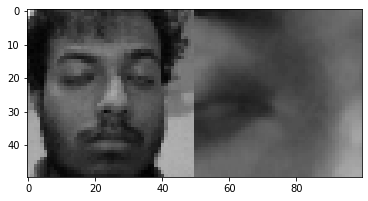

close


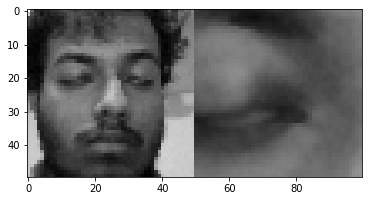

close


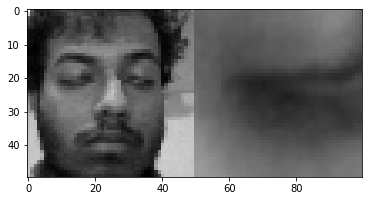

open


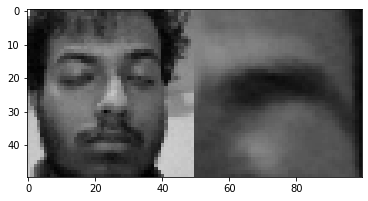

open


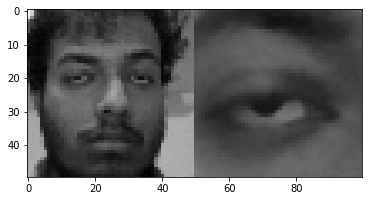

close


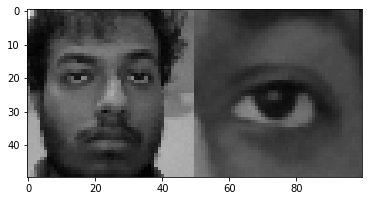

open


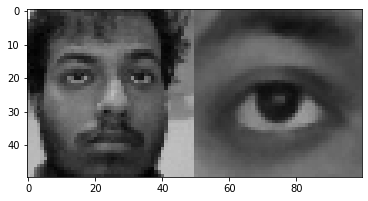

open


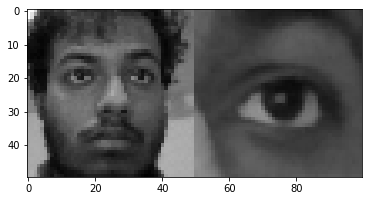

open


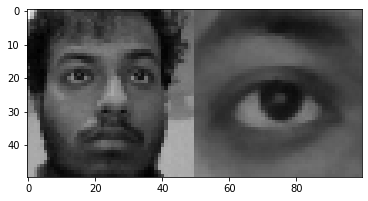

open


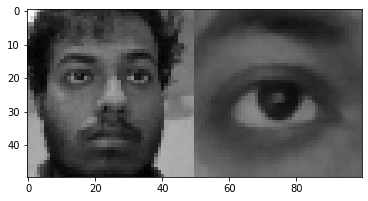

open


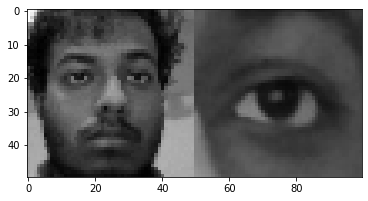

open


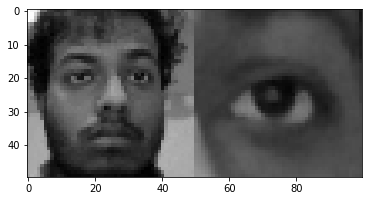

close


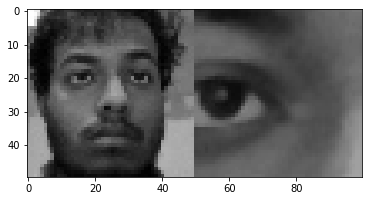

open


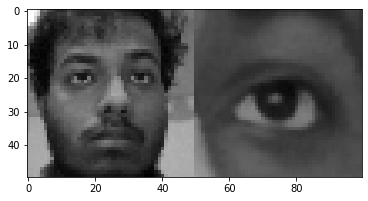

open


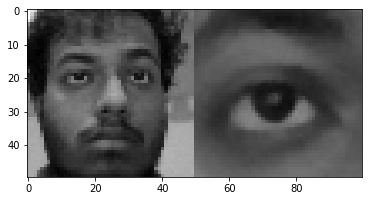

open


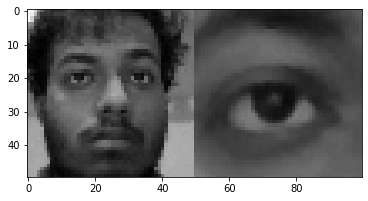

open


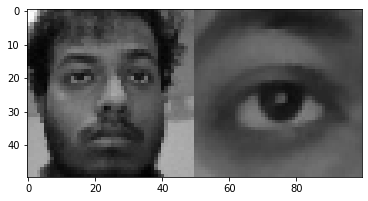

open


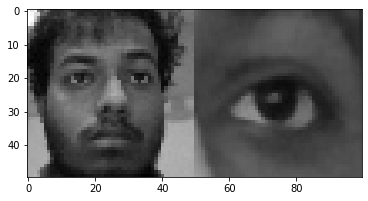

open


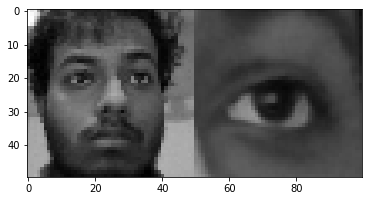

open


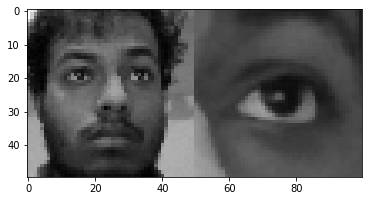

open


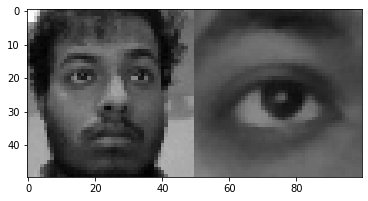

open


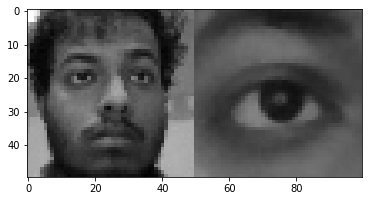

open


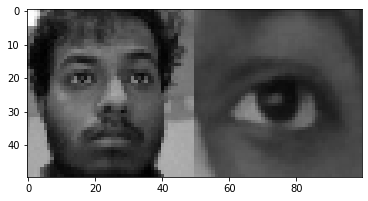

open


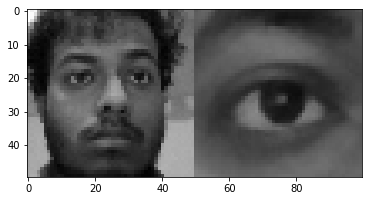

open


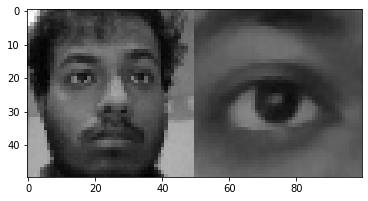

open


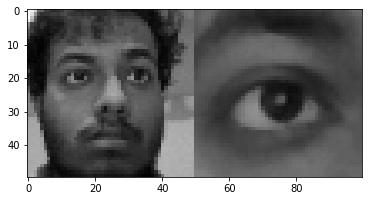

open


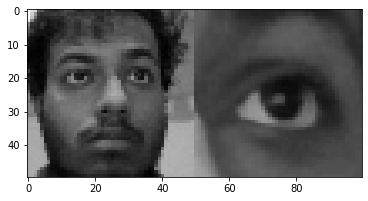

open


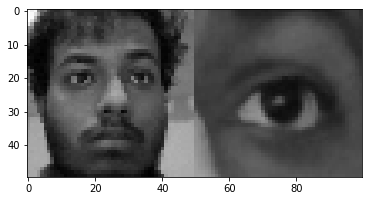

open


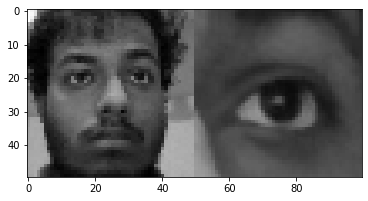

open


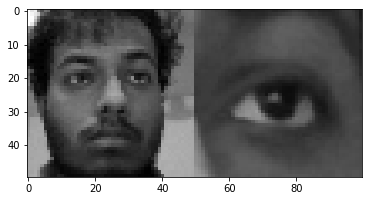

open


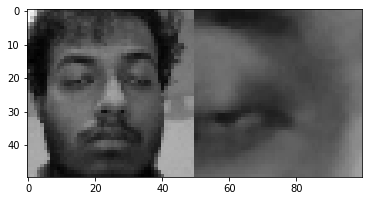

close


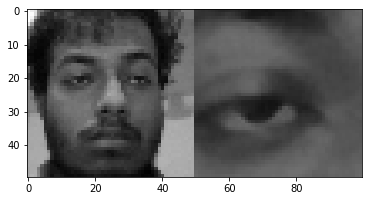

close


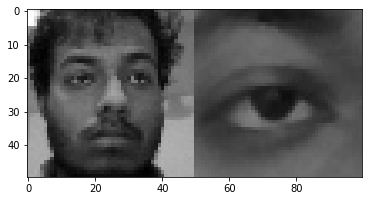

open


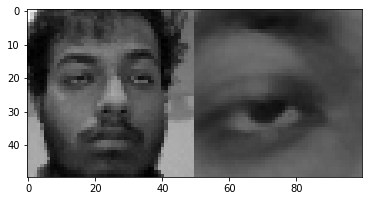

close


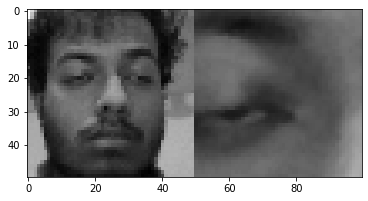

close


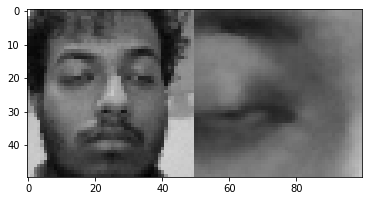

close


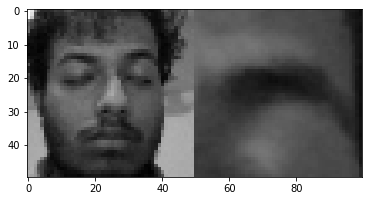

open


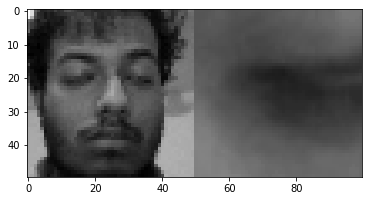

close


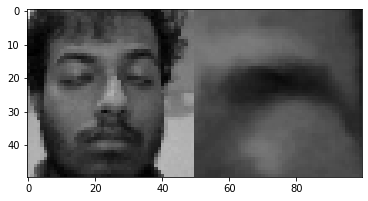

open


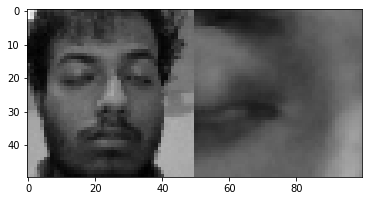

close


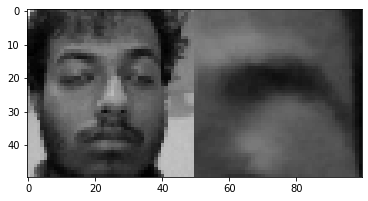

open


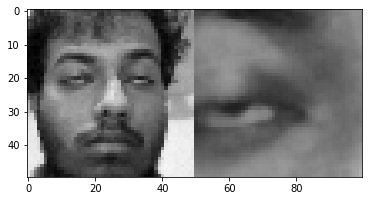

close


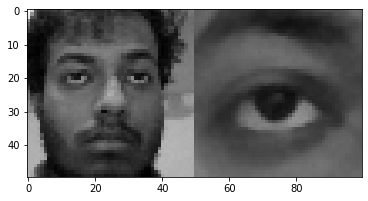

open


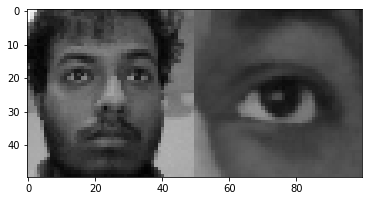

open


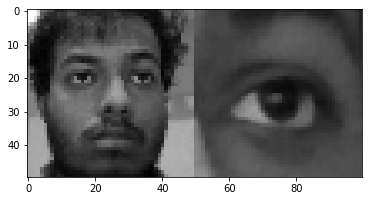

open


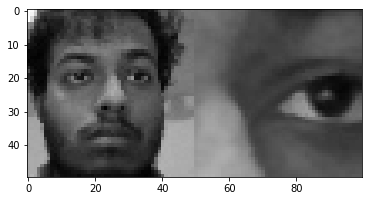

close


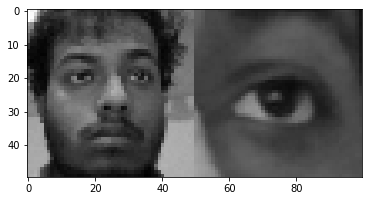

open


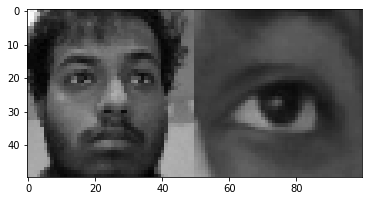

open


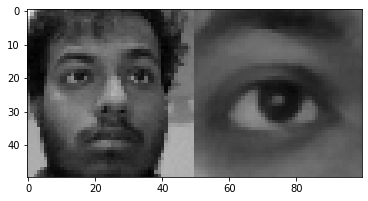

open


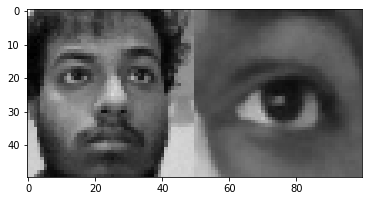

open


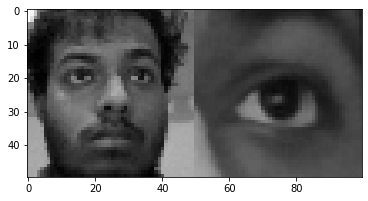

open


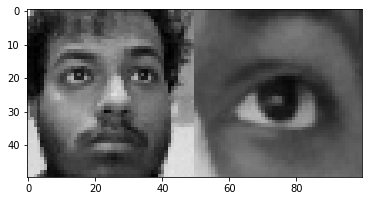

open


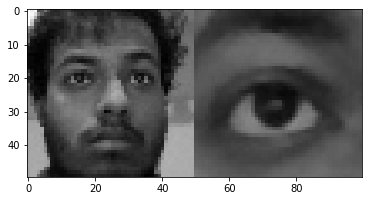

open


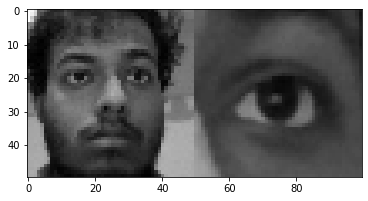

open


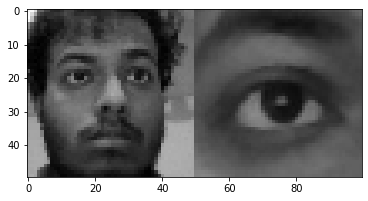

open


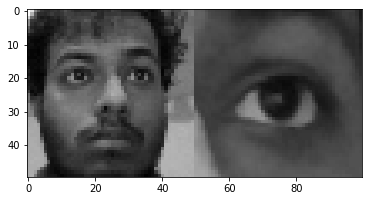

open


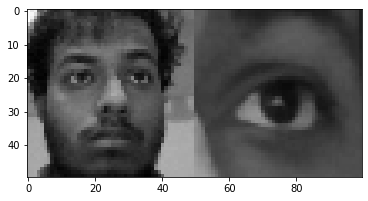

open


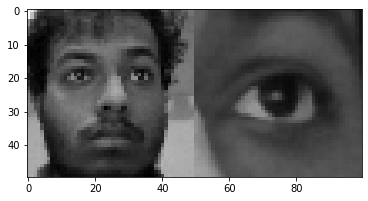

open


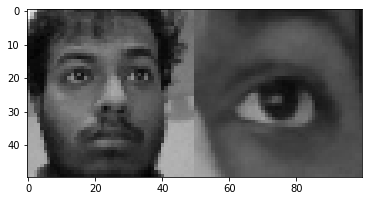

open


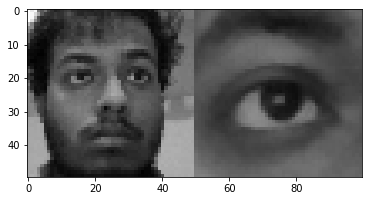

open


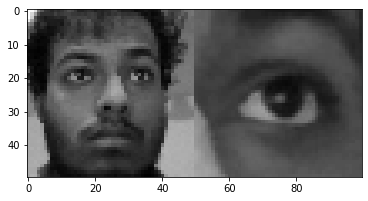

open


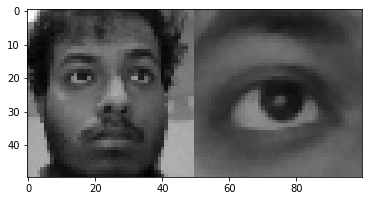

open


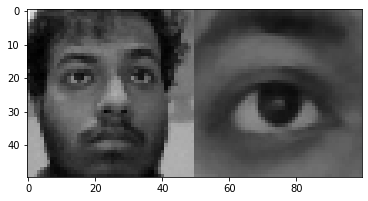

open


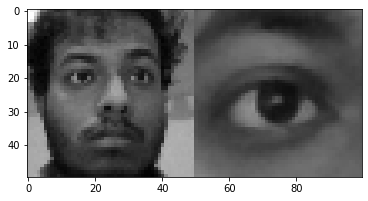

open


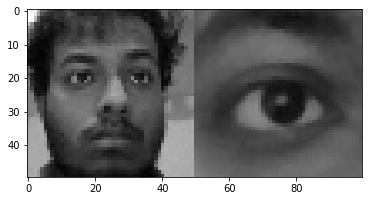

open


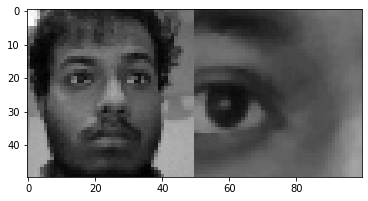

open


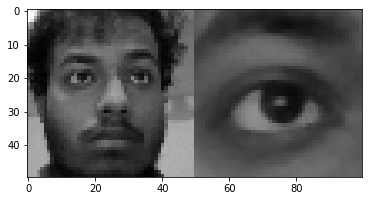

open


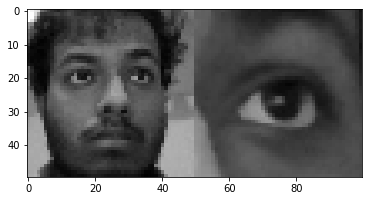

open


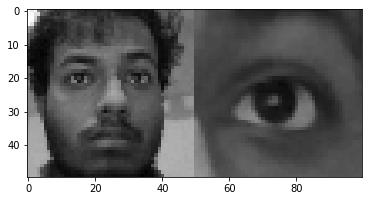

open


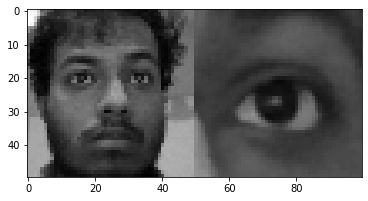

open


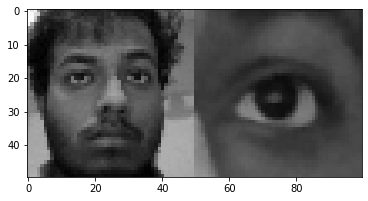

open


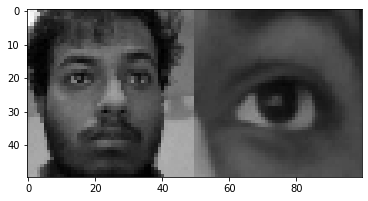

open


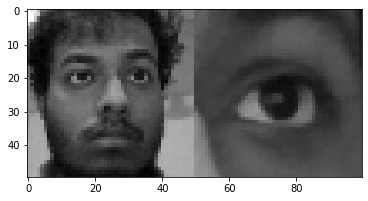

open


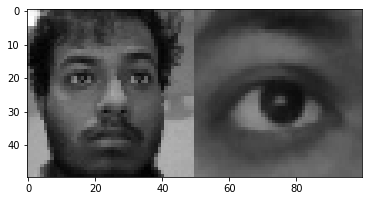

open


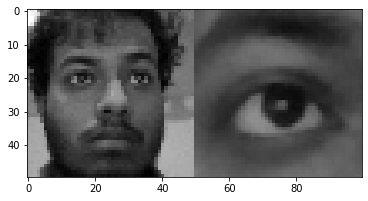

open


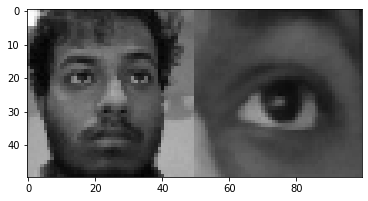

open


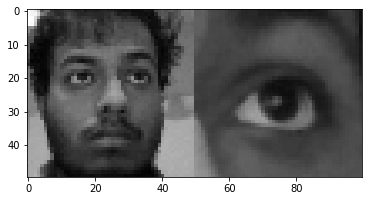

open


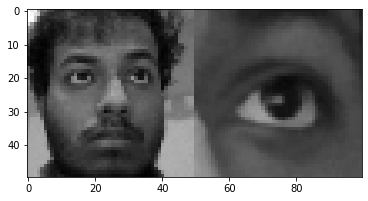

open


In [62]:
cap = cv2.VideoCapture(0)
start_time = time.time()
seconds = 30
store = {}
e = []
while 1:
    current_time = time.time()
    elapsed_time = current_time - start_time
    if elapsed_time > seconds:
        break
    eyes = []
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        
        roi_gray = gray[y:y+h//2, x:x+w]
        roi_color = img[y:y+h//2, x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
    if(len(eyes) != 0):
        e = cv2.resize(roi_gray[ey-7:ey+eh+10, ex-7:ex+ew+10], (50,50))
        arr =np.concatenate((cv2.resize(gray[y:y+h, x:x+w],(50,50)), e), axis = 1)
        plt.imshow(arr, cmap = 'gray')
        plt.show()
        e = e.reshape(-1, 50, 50, 1)
        res = model.predict(e)
        print("open"if(np.argmax(res[0]) == 1)else"close")
        
        store[elapsed_time] = res[0][0]
        
    cv2.imshow('img',img)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

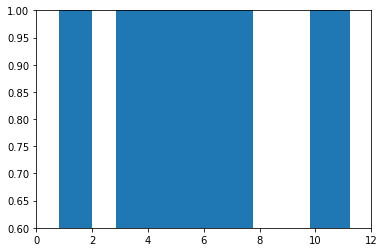

In [63]:
cap.release()
cv2.destroyAllWindows()
plt.ylim([0.6, 1])
plt.xlim([0, 12])
plt.bar(store.keys(), store.values())

plt.show()

In [56]:
print(store)

{0.0: 0.0, 0.7118608951568604: 2.284536e-25, 0.8973755836486816: 1.0, 1.0715391635894775: 8.4857786e-26, 1.241793155670166: 7.0586543e-37, 1.4070942401885986: 0.99999976, 1.6274070739746094: 0.0, 1.8135318756103516: 8.513905e-30, 1.9858746528625488: 9.646094e-13, 2.1632189750671387: 2.7885962e-17, 2.3967809677124023: 1.0, 2.562560558319092: 1.0, 2.8142573833465576: 1.0, 2.9811112880706787: 1.0, 3.380048990249634: 0.00010766778, 3.681095838546753: 0.95288754, 3.8525784015655518: 1.0, 4.0302064418792725: 1.0, 4.197754859924316: 0.11449223, 4.363211631774902: 5.2504816e-05, 4.539355993270874: 1.0, 4.7111780643463135: 1.0, 4.882903575897217: 1.0, 5.194410562515259: 1.0, 5.359970331192017: 0.0010611386, 5.527349472045898: 1.0, 5.68790864944458: 1.0, 5.8608927726745605: 1.1603889e-13, 6.044469118118286: 1.0, 6.214751482009888: 1.0, 6.388799428939819: 1.0, 6.561739206314087: 0.0, 6.7485363483428955: 1.0, 6.923157691955566: 1.0, 7.091893196105957: 1.0, 7.263909578323364: 0.0003868384, 7.438419

# watermark

In [136]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tqdm import tqdm
import threading

In [137]:
BASE_DIR = "C:/Users/Souvik_2/watermarks/train/"
folders = ["no_watermark_watermark/", "no-watermark"]

training_data_water = {}
training_data = {}
im1 = []
im2 = []

path = os.path.join(BASE_DIR, folders[0])
for images in tqdm(os.listdir(path)):
    img_arr = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
    try:
        opt_img_arr = cv2.resize(img_arr, (100, 100))
        training_data[images] = opt_img_arr
    except:
        print('error')
    
path = os.path.join(BASE_DIR, folders[1])
for images in tqdm(os.listdir(path)):
    img_arr = cv2.imread(os.path.join(path, images), cv2.IMREAD_GRAYSCALE)
    try:
        opt_img_arr = cv2.resize(img_arr, (100, 100))
        training_data_water[images] = opt_img_arr
    except:
        print('error')
    

100%|█████████████████████████████████████████████████████████████████████████████| 1982/1982 [00:08<00:00, 228.19it/s]


In [35]:
X = [training_data_water, training_data]

In [56]:
import pickle
import numpy as np
import tensorflow as tf

In [36]:
b = open('water_mark_images','wb')
pickle.dump(X, b)

In [37]:
b = open('water_mark_images','rb')
data = pickle.load(b)

In [142]:
X = np.array([j for i,j in training_data_water.items() if i in training_data.keys()]).reshape(-1, 100, 100, 1) 
Y = np.array([j for i,j in training_data.items() if i in training_data_water.keys()]).reshape(-1, 100, 100, 1) 

In [145]:
X=X/255.0
Y=Y/255.0
print(X.shape,
Y.shape)

(1980, 100, 100, 1) (1980, 100, 100, 1)


In [ ]:
import cv2
import numpy as np

img = cv2.imread("E:/Youtube game/works/Dr. (Mrs.) Sheetal Bhurke.jpg")

alpha = 2.0
beta = -160

new = alpha * img + beta
new = np.clip(new, 0, 255).astype(np.uint8)

cv2.imwrite("cleaned.png", new)
cv2.imshow()

In [5]:
import numpy as np
import cv2
import os
from tqdm import tqdm
DIR = 'E:/Youtube game/works/Jaipur/'
def remove_watermark(src):
    img = cv2.imread(src)
    mask = cv2.imread("E:/Youtube game/works/mask.jpg")
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    dst = cv2.inpaint(img,mask,3,cv2.INPAINT_TELEA)
    cv2.imwrite(DIR+src.split('/')[-1],dst)

for i in tqdm(os.listdir(DIR)):
    try:
        remove_watermark(DIR+i)
    except:
        pass

0it [00:00, ?it/s]


In [4]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import numpy as np

In [122]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3,3), input_shape = X.shape[1:]))
model.add(LeakyReLU(alpha = 0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3)))
model.add(LeakyReLU(alpha = 0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(16))

model.add(Dense(np.prod([96,96,64])))
model.add(Reshape((96,96,64)))
model.add(Conv2DTranspose(64, (3,3)))
model.add(LeakyReLU(alpha = 0.2))
model.add(BatchNormalization())
model.add(Conv2DTranspose(32, (3,3)))
model.add(LeakyReLU(alpha = 0.2))
model.add(BatchNormalization())
model.add(Conv2DTranspose(1, (3,3), strides = 1 , padding = 'same',activation = 'sigmoid'))

model.compile(loss = 'mse', optimizer = 'Adam',metrics = ['accuracy'])

In [121]:
model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_84 (Conv2D)           (None, 98, 98, 32)        320       
_________________________________________________________________
leaky_re_lu_130 (LeakyReLU)  (None, 98, 98, 32)        0         
_________________________________________________________________
batch_normalization_125 (Bat (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
leaky_re_lu_131 (LeakyReLU)  (None, 96, 96, 64)        0         
_________________________________________________________________
batch_normalization_126 (Bat (None, 96, 96, 64)        256       
_________________________________________________________________
flatten_39 (Flatten)         (None, 589824)          

In [158]:
model.fit(Y, Y, batch_size = 32, epochs=100)

Epoch 1/100
62/62 [==============================] - 10s 162ms/step - loss: 3.1243e-07 - accuracy: 0.0068
Epoch 2/100
62/62 [==============================] - 10s 162ms/step - loss: 3.0154e-07 - accuracy: 0.0068
Epoch 3/100
62/62 [==============================] - 10s 162ms/step - loss: 2.9104e-07 - accuracy: 0.0068
Epoch 4/100
40/62 [==================>...........] - ETA: 3s - loss: 2.8266e-07 - accuracy: 0.0065

KeyboardInterrupt: 

In [159]:
b = model.predict(Y[30:31])
b[0].shape

(100, 100, 1)

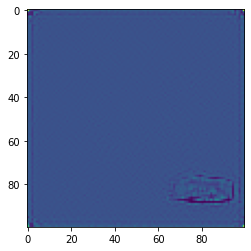

In [160]:
import matplotlib.pyplot as plt
plt.imshow(b[0])

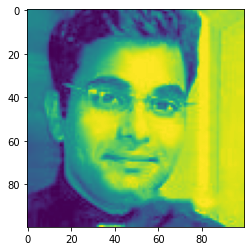

In [157]:
X[21].shape
plt.imshow(X[30])

# chatbot

In [61]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from sklearn.utils import shuffle

In [39]:
def create_bag_words(data):
    words = []
    dic = {}
    for i in data:
        collection_sentences = i['q']
        for sentences in collection_sentences:
            words.extend(sentences.split())
    words = list(set(words))
    for i in range(len(words)):
        dic[words[i].lower()] = i+1
    return dic

def find_max_len_sentence(data):
    max_len = -1
    for i in data:
        q = i["q"]
        for j in q:
            if(len(j.split()) > max_len):
                max_len = len(j.split())
    return max_len

def prepare_data(data):
    unique_words = create_bag_words(data)
    length_sentence = find_max_len_sentence(data)

    X = []
    Y = []
    for i in data:
        q = i['q']
        for question in q:
            upl = []
            for m in question.split():
                padding = length_sentence - len(question.split())
                upl.append((unique_words[m.lower()])/len(unique_words))
            X.append(upl+[0]*padding)
            m = [0]*len(data)
            m[i['index']] = 1
            Y.append(m)
    return X,Y

def result(data, number):
    for i in data:
        if i['index'] == number:
            return random.choice(i['a'])
data = [
    {
        "index":0,
        "q": ["hello", "Hi", "good morning", "whats up","hi there"],
        "a": ["hi", "hello", "welcome to this"]
    },
    {
        "index":1,
        "q": ["I am not feeling well", "Health not good", "I am sick"],
        "a":["What happened", "Ooo what is your problem"],
    },
    {
        "index": 2,
        "q" : ["I have fever", "My temperature is high"],
        "a" : ["Do you consult with doctor"],
    },
    {
        "index": 3,
        "q" : ["I want to know about some doctors", "Need some doctor information"],
        "a" : ["Yes we have information"],
    },
    {
        "index": 4,
        "q" : ["bye", "goodbye"],
        "a" : ["ok bye"],
    }
]

In [40]:
X, Y = prepare_data(data)

In [41]:
X = np.array(X)
Y = np.array(Y)

In [63]:
X, Y = shuffle(X, Y)
Y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [74]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = X.shape[1:]))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(len(data), activation = 'softmax'))

tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07
)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X, Y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 393ms/step - loss: 1.6083 - accuracy: 0.0714
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.5892 - accuracy: 0.1429
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.5727 - accuracy: 0.3571
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.5579 - accuracy: 0.4286
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.5432 - accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.5288 - accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.5141 - accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.4996 - accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.4855 - accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.4706 - accuracy: 0.5000
Epoch 11/1000
1/1

1/1 [==============================] - 0s 6ms/step - loss: 0.1113 - accuracy: 0.9286
Epoch 166/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1101 - accuracy: 0.9286
Epoch 167/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1099 - accuracy: 0.9286
Epoch 168/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1091 - accuracy: 0.9286
Epoch 169/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1084 - accuracy: 0.9286
Epoch 170/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9286
Epoch 171/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1072 - accuracy: 0.9286
Epoch 172/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1063 - accuracy: 0.9286
Epoch 173/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1056 - accuracy: 0.9286
Epoch 174/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1056 - accuracy: 0.9286
Epoch 175/1000


1/1 [==============================] - 0s 7ms/step - loss: 0.0401 - accuracy: 1.0000
Epoch 248/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0390 - accuracy: 1.0000
Epoch 249/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 1.0000
Epoch 250/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 1.0000
Epoch 251/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0366 - accuracy: 1.0000
Epoch 252/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0359 - accuracy: 1.0000
Epoch 253/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 1.0000
Epoch 254/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0346 - accuracy: 1.0000
Epoch 255/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 1.0000
Epoch 256/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 1.0000
Epoch 257/1000


1/1 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 330/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 331/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 332/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 333/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 334/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 335/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0066 - accuracy: 1.0000
Epoch 336/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 337/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 1.0000
Epoch 338/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 1.0000
Epoch 339/1000


1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 493/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 494/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 495/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 496/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 497/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 498/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 499/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 500/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 501/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 502/1000


1/1 [==============================] - 0s 5ms/step - loss: 5.5733e-04 - accuracy: 1.0000
Epoch 651/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.5209e-04 - accuracy: 1.0000
Epoch 652/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.5084e-04 - accuracy: 1.0000
Epoch 653/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.4778e-04 - accuracy: 1.0000
Epoch 654/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.4559e-04 - accuracy: 1.0000
Epoch 655/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.4306e-04 - accuracy: 1.0000
Epoch 656/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.4063e-04 - accuracy: 1.0000
Epoch 657/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.3850e-04 - accuracy: 1.0000
Epoch 658/1000
1/1 [==============================] - 0s 4ms/step - loss: 5.3823e-04 - accuracy: 1.0000
Epoch 659/1000
1/1 [==============================] - 0s 5ms/step - loss: 5.351

1/1 [==============================] - 0s 5ms/step - loss: 3.1235e-04 - accuracy: 1.0000
Epoch 807/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.1099e-04 - accuracy: 1.0000
Epoch 808/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.0964e-04 - accuracy: 1.0000
Epoch 809/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.0885e-04 - accuracy: 1.0000
Epoch 810/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.0799e-04 - accuracy: 1.0000
Epoch 811/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.0746e-04 - accuracy: 1.0000
Epoch 812/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.0583e-04 - accuracy: 1.0000
Epoch 813/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.0517e-04 - accuracy: 1.0000
Epoch 814/1000
1/1 [==============================] - 0s 3ms/step - loss: 3.0388e-04 - accuracy: 1.0000
Epoch 815/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.025

1/1 [==============================] - 0s 5ms/step - loss: 1.9916e-04 - accuracy: 1.0000
Epoch 963/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9882e-04 - accuracy: 1.0000
Epoch 964/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9846e-04 - accuracy: 1.0000
Epoch 965/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9785e-04 - accuracy: 1.0000
Epoch 966/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9738e-04 - accuracy: 1.0000
Epoch 967/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9682e-04 - accuracy: 1.0000
Epoch 968/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9633e-04 - accuracy: 1.0000
Epoch 969/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9569e-04 - accuracy: 1.0000
Epoch 970/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.9518e-04 - accuracy: 1.0000
Epoch 971/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.945

In [81]:
prediction = "fever"
out = []
table = create_bag_words(data)
tot = find_max_len_sentence(data)
for i in prediction.split():
    out.append(table[i]/len(table))
padding = tot - len(prediction.split())
out += [0]*padding
print(np.argmax(model.predict([out])))
print(">>", result(data, np.argmax(model.predict([out]))))

1
>> What happened


In [43]:
create_bag_words(data)

{'How': 1,
 'Goodbye': 2,
 'good': 3,
 'your': 4,
 'lived': 5,
 'is': 6,
 'bye': 7,
 'have': 8,
 'Hi': 9,
 'whats': 10,
 'you': 11,
 'name': 12,
 'cya': 13,
 'days': 14,
 'see': 15,
 'age': 16,
 'what': 17,
 'are': 18,
 'who': 19,
 'morning': 20,
 'up': 21,
 'youeself': 22,
 'ya': 23,
 'identify': 24,
 'many': 25,
 'there': 26,
 'old': 27,
 'hi': 28,
 'hello': 29}

In [288]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout,Embedding
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, Activation, RepeatVector, TimeDistributed

In [2]:
with open('dialogs.txt') as f:
    lines = f.readlines()
question = []
answer = []
for i in lines:
    i = i.split('\t')
    question.append(i[0])
    i[1] = i[1].strip()
    answer.append(i[1].strip())
    
tot = question + answer

In [3]:
def create_bag_of_words(array):
    table = {}
    count = 1
    for sentences in tot:
        for word in sentences.split():
            if(word not in table.keys()):
                table[word] = count
                count += 1
    return table

def highest_length_sentence(array):
    maxx = -1
    for i in tot:
        i = len(i.split())
        if(i > maxx):
            maxx = i
    return maxx

def data_conversion(array):
    out = []
    for i in array:
        i = i.split()
        padding = maxx_length - len(i)
        ins = []
        for m in i:
            ins.append(table[m])
        ins += [0]*padding
        out.append([ins])
    return out

In [4]:
table = create_bag_of_words(tot)
maxx_length = highest_length_sentence(tot)

In [125]:
X = np.array(data_conversion(question))/len(table)
Y = np.array(data_conversion(answer))/len(table)

In [145]:
def seq2seq_f(encoder, decode, do_decode):
    return tf.nn.seq2seq.embedding_attention_seq2seq(
        encoder,decoder,cell,
        num_encoder_symbols = source_vocab_size,
        num_decoder_size = target_vocab_size,
        embedding_size = size,
        output_projection = output_projection,
        feed_previous = do_decode,
    )
'''model = Sequential()
model.add(LSTM(100,activation = 'relu' ,input_shape = (X.shape[1:])))
model.add(RepeatVector(19))
model.add(LSTM(100, activation = 'relu' ,return_sequences = True))
model.add(TimeDistributed(Dense(1)))

model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
model.summary()
history = model.fit(X, Y, epochs = 10)
'''
'''model = Sequential()
model.add(LSTM(128, input_shape = (X.shape[1:]), activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation = 'sigmoid'))'''

"model = Sequential()\nmodel.add(LSTM(128, input_shape = (X.shape[1:]), activation = 'relu', return_sequences = True))\nmodel.add(Dropout(0.2))\nmodel.add(LSTM(128, activation = 'relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(32, activation = 'relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(19, activation = 'sigmoid'))"

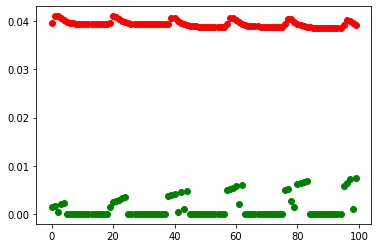

In [138]:
import matplotlib.pyplot as plt
result = model.predict(X)
result.reshape((3725*19))
plt.scatter(range(100), result.reshape(3725*19)[:100], c = 'r')
plt.scatter(range(100), Y.reshape(3725*19)[:100], c = 'g')

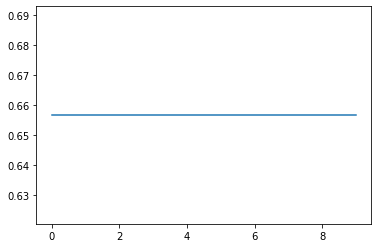

In [139]:
plt.plot(history.history['accuracy'])

In [118]:
X.shape

(3725, 1, 19)

In [8]:
Y.shape

(3725, 19)

In [27]:
result.reshape(3725*19)

array([ 1.8107314e-02,  3.7808418e-02,  2.8537072e-02, ...,
        9.3061761e-05, -3.3172870e-05, -2.3538949e-05], dtype=float32)

In [28]:
Y.reshape(3725*19)

array([0.00148552, 0.0017331 , 0.00049517, ..., 0.        , 0.        ,
       0.        ])

In [49]:
len(table)

4039

In [141]:
ss = data_conversion(["how are you"])
ss = model.predict(np.array(ss)/len(table))

In [142]:
b = data_conversion(['i am fine'])
b = np.array(b)/len(table)

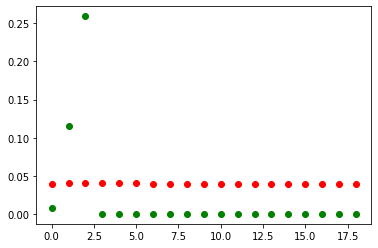

In [143]:
plt.scatter(range(19), ss.reshape(19), c = 'r')
plt.scatter(range(19), b.reshape(19), c = 'g')

In [129]:
np.max(X)

0.9368655607823718

In [260]:
from sklearn.model_selection import train_test_split
data = np.array(([[[i+j] for i in range(5)]for j in range(100)]))/100
target = np.array([(i+5) for i in range(100)])/100
X, X_test, Y, Y_test = train_test_split(data, target, test_size = 0.2, random_state = 2)

In [261]:
model = Sequential()
model.add(CuDNNLSTM((1), input_shape = (data.shape[1:])))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['accuracy'])
model.fit(X, Y, epochs = 500, validation_data = (X_test, Y_test))

Epoch 1/500
3/3 [==============================] - 1s 132ms/step - loss: 0.3517 - accuracy: 0.0000e+00 - val_loss: 0.2476 - val_accuracy: 0.0000e+00
Epoch 2/500
3/3 [==============================] - 0s 24ms/step - loss: 0.3559 - accuracy: 0.0000e+00 - val_loss: 0.2444 - val_accuracy: 0.0000e+00
Epoch 3/500
3/3 [==============================] - 0s 24ms/step - loss: 0.3506 - accuracy: 0.0000e+00 - val_loss: 0.2411 - val_accuracy: 0.0000e+00
Epoch 4/500
3/3 [==============================] - 0s 20ms/step - loss: 0.3554 - accuracy: 0.0000e+00 - val_loss: 0.2379 - val_accuracy: 0.0000e+00
Epoch 5/500
3/3 [==============================] - 0s 20ms/step - loss: 0.3343 - accuracy: 0.0000e+00 - val_loss: 0.2345 - val_accuracy: 0.0000e+00
Epoch 6/500
3/3 [==============================] - 0s 23ms/step - loss: 0.3365 - accuracy: 0.0000e+00 - val_loss: 0.2311 - val_accuracy: 0.0000e+00
Epoch 7/500
3/3 [==============================] - 0s 25ms/step - loss: 0.3167 - accuracy: 0.0000e+00 - val_los

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000234D77099D8>
Traceback (most recent call last):
  File "E:\software\anaconda\envs\gputest\lib\weakref.py", line 359, in remove
    self = selfref()
KeyboardInterrupt


Epoch 36/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1591 - accuracy: 0.0000e+00 - val_loss: 0.1202 - val_accuracy: 0.0000e+00
Epoch 37/500
3/3 [==============================] - 0s 24ms/step - loss: 0.1449 - accuracy: 0.0000e+00 - val_loss: 0.1175 - val_accuracy: 0.0000e+00
Epoch 38/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1506 - accuracy: 0.0000e+00 - val_loss: 0.1150 - val_accuracy: 0.0000e+00
Epoch 39/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1461 - accuracy: 0.0000e+00 - val_loss: 0.1126 - val_accuracy: 0.0000e+00
Epoch 40/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1456 - accuracy: 0.0000e+00 - val_loss: 0.1104 - val_accuracy: 0.0000e+00
Epoch 41/500
3/3 [==============================] - 0s 21ms/step - loss: 0.1421 - accuracy: 0.0000e+00 - val_loss: 0.1084 - val_accuracy: 0.0000e+00
Epoch 42/500
3/3 [==============================] - 0s 22ms/step - loss: 0.1255 - accuracy: 0.0000e+00 - v

KeyboardInterrupt: 

In [262]:
#res = model.predict(data)
data

array([[[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]],

       [[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]],

       [[0.02],
        [0.03],
        [0.04],
        [0.05],
        [0.06]],

       [[0.03],
        [0.04],
        [0.05],
        [0.06],
        [0.07]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.05],
        [0.06],
        [0.07],
        [0.08],
        [0.09]],

       [[0.06],
        [0.07],
        [0.08],
        [0.09],
        [0.1 ]],

       [[0.07],
        [0.08],
        [0.09],
        [0.1 ],
        [0.11]],

       [[0.08],
        [0.09],
        [0.1 ],
        [0.11],
        [0.12]],

       [[0.09],
        [0.1 ],
        [0.11],
        [0.12],
        [0.13]],

       [[0.1 ],
        [0.11],
        [0.12],
        [0.13],
        [0.14]],

       [[0.11],
        [0.12],
        [0.13],
        [0.14],
        [0.15]],

       [[0.12],


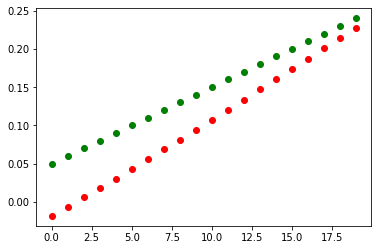

In [226]:
plt.scatter(range(20), res[:20], c='r')
plt.scatter(range(20), target[:20], c = 'g')

In [171]:
res.shape

(100, 1)

In [172]:
target.shape

(100,)

In [227]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_55 (CuDNNLSTM)    (None, 1)                 16        
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [263]:
data = ["hello", "how are you", "what you are doing", "bye", "do you want to play", "do you have exams"]
ans = ["hi", "fine", "i am studying", "goodbye", "no", "yes"]

bag = {}
max_len = -1
count = 1
for i in data+ans:
    if len(i.split())>max_len:
            max_len = len(i.split())
    for j in i.split():
        if j not in bag:
            bag[j] = count
            count+=1

In [303]:
X = []
Y = [] 
for i in data:
    length = len(i.split())
    m = []
    for j in i.split():
        m .append([bag[j]])
    m+=[[0]]*(max_len-length)
    X.append(m)
for i in ans:
    length = len(i.split())
    m = []
    for j in i.split():
        m .append([bag[j]])
    m+=[[0]]*(max_len-length)
    Y.append(m)

In [304]:
X = np.array(X)/len(bag)
Y = np.array(Y)/len(bag)

In [321]:
model = Sequential()
model.add(LSTM(512, input_shape = (X.shape[1:])))
model.add(RepeatVector(max_len))
model.add(LSTM(512, return_sequences = True))
model.add(Dense(1, activation = 'relu'))
model.summary()

model.compile(optimizer = 'adam', loss='mse', metrics = ['accuracy'])
model.fit(X,Y, epochs = 100)

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_48 (LSTM)               (None, 512)               1052672   
_________________________________________________________________
repeat_vector_37 (RepeatVect (None, 5, 512)            0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 5, 512)            2099200   
_________________________________________________________________
dense_28 (Dense)             (None, 5, 1)              513       
Total params: 3,152,385
Trainable params: 3,152,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.1881 - accuracy: 0.7333
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.1785 - accuracy: 0.7333
Epoch 3/100
1/1 [==============================

In [316]:
res = model.predict(X)

In [322]:
res

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)

In [16]:
#RNN mnist dataset
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
print(x_train.shape)

(60000, 28, 28)


In [17]:
model = Sequential()
model.add(CuDNNLSTM(128, input_shape=((28,28)), return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation = 'softmax'))

In [18]:
opt = tf.keras.optimizers.Adam(lr = 1e-3, decay=1e-5)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3, validation_data = (x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 23s 9ms/step - loss: 0.8415 - accuracy: 0.7232 - val_loss: 0.1674 - val_accuracy: 0.9539
Epoch 2/3
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1389 - accuracy: 0.9639 - val_loss: 0.1045 - val_accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0939 - accuracy: 0.9758 - val_loss: 0.0604 - val_accuracy: 0.9830


In [1]:
#RNN with criptodata
import pandas as pd

SEQ_LEN = 60
FUTURE_PERIOD_PREDICT = 3
RATIO_TO_PREDICT = "LTC-USD"

def ifinc(current, future):
    if(future > current): return 1
    return 0

main_df = pd.DataFrame()
files = ['BTC-USD', 'LTC-USD', 'ETH-USD', 'BCH-USD']
for file in files:
    dataset = f"crypto_data/{file}.csv"
    df = pd.read_csv(dataset, names = ['time','low', 'high', 'open', 'close', 'volume'])
    df.rename(columns={'close':f'{file}_close', 'volume':f"{file}_volume"}, inplace=True)
    df.set_index("time", inplace=True)
    df = df[[f"{file}_close", f'{file}_volume']]
    if(len(main_df) == 0):
        main_df = df
    else:
        main_df = main_df.join(df)

main_df['future'] = main_df[f'{RATIO_TO_PREDICT}_close'].shift(-FUTURE_PERIOD_PREDICT)
main_df['target'] = list(map(ifinc, main_df[f'{RATIO_TO_PREDICT}_close'], main_df["future"]))
print(main_df[[f'{RATIO_TO_PREDICT}_close', "future", "target"]].head())


            LTC-USD_close     future  target
time                                        
1528968660      96.580002  96.500000       0
1528968720      96.660004  96.389999       0
1528968780      96.570000  96.519997       0
1528968840      96.500000  96.440002       0
1528968900      96.389999  96.470001       1


In [4]:
from googletrans import Translator
import speech_recognition as sr

r2 = sr.Recognizer()
with sr.Microphone() as source:
    print("I am in")
    audio = r2.listen(source)
    try:
        get = r2.recognize_google(audio)
        print(get)
    except:
        pass

I am in


KeyboardInterrupt: 

# generating mnist

In [12]:
#dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Reshape,Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer, Input
import matplotlib.pyplot as plt

In [4]:
#loading data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [5]:
#data preprocessing
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [20]:
#encorder
enc_inp = Input(shape = (28, 28, 1), name = 'img')
x = Flatten()(enc_inp)
enc_out = Dense(64)(x)

encoder = Model(enc_inp, enc_out, name = 'encoder')
#decorder

dec_inp = Dense(784, activation = 'relu')(enc_out)
dec_out = Reshape((28,28,1))(dec_inp)

auto_enc = Model(enc_inp, dec_out, name = "autoenc")

auto_enc.summary()


Model: "autoenc"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               50960     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [21]:
#compilation and prediction
auto_enc.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['accuracy'])
auto_enc.fit(x_train, x_train, epochs=3,  batch_size = 32, validation_data=(x_test, x_test))
out = auto_enc.predict(x_test)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0048 - accuracy: 0.8087 - val_loss: 0.0019 - val_accuracy: 0.8073
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0019 - accuracy: 0.8084 - val_loss: 0.0017 - val_accuracy: 0.8073
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0018 - accuracy: 0.8088 - val_loss: 0.0017 - val_accuracy: 0.8073


In [22]:
#visualisation
ex = encoder.predict([x_test[1].reshape(-1, 28, 28, 1)])[0]
print(ex)

[-0.30210826  0.68747604 -0.1008402   0.4588575  -0.11447902 -0.38635984
  0.1671448  -0.12296541 -0.7217913   0.8748594   0.17427322  0.31119934
 -0.49536467  0.23621295  0.16825905  0.02901535  0.8040509  -0.7705638
 -0.5026866  -0.01943867 -0.15608332 -0.1098474   0.04437989 -0.72913605
  0.30763426 -0.43925503  0.24364763  0.5077187   0.3065695  -0.3167874
  1.2774482   0.16100201  0.05253293  0.23189822 -0.03216894  0.6908429
 -0.2505614   0.3544121   0.33546752  1.3860745   0.52080125 -0.01247831
 -0.28696078 -0.3066482  -0.3733851  -0.26367852 -0.35321712  0.05357313
  0.5871492  -0.04121682  0.6696128   0.83938897  0.22824684  0.9561942
  0.22815555  0.45775235  0.08162773  0.5738948  -0.953812    0.4678284
 -0.32863462  0.2596707  -0.19052304 -0.5362556 ]


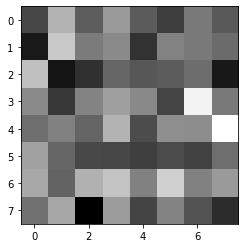

In [24]:
plt.imshow(ex.reshape(8,8), cmap = 'gray')

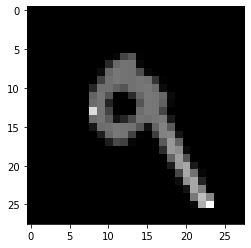

In [25]:
plt.imshow(x_test[7], cmap = "gray")

In [26]:
ae_out = auto_enc.predict([x_test[7].reshape(-1, 28, 28, 1)])[0]

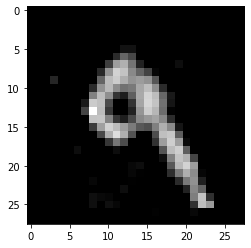

In [27]:
plt.imshow(ae_out, cmap = "gray")

# GAN

In [25]:
#modules
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose,Reshape,Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer, Input, LeakyReLU
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import numpy as np
import time

In [26]:
#loading data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()
#data preprocessing
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [ ]:
buffer_size = 1000
batch_size = 256

In [8]:
def make_generator_model():
    model = Sequential()
    model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size
    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(LeakyReLU())
    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

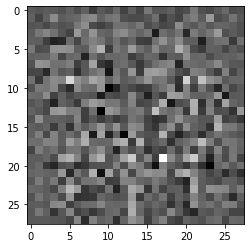

In [9]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
#experiment

In [12]:
def make_discriminator_model():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1))

    return model

In [13]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00172327]], shape=(1, 1), dtype=float32)


In [15]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [14]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [16]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [17]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [18]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [20]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [21]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [30]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

    for image_batch in dataset:
        train_step(image_batch.reshape(-1,28,28,1))

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

    # Generate after the final epoch
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                           epochs,
                           seed)

In [31]:
train(x_train, EPOCHS)

KeyboardInterrupt: 

In [28]:
BATCH_SIZE = 256

# wordgenerator

In [16]:
#modules
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import numpy as np
import time

In [17]:
file = "eng_book.txt"
inp = open(file, 'r', encoding = 'utf-8').read()
inp = inp.lower()
inp = ''.join(i for i in inp if not i.isdigit())
characters = sorted(list(set(inp)))

In [18]:
char_memo_int = dict((c,i) for i, c in enumerate(characters))
int_memo_char = dict((i,c) for i, c in enumerate(characters))

In [19]:
#preparing data to feed in model
seq_length = 60
seq_jump = 10
sentences = []
next_char = []
for i in range(0, len(inp) - seq_length, seq_jump):
    sentences.append(inp[i: i+seq_length])
    next_char.append(inp[i+seq_length])

In [20]:
x = np.zeros((len(sentences), seq_length, len(characters)))
y = np.zeros((len(next_char), len(characters)))

for i, j in enumerate(sentences):
    for t, u  in enumerate(j):
        x[i, t, char_memo_int[u]] = 1
    y[i, char_memo_int[next_char[i]]] = 1

In [21]:
model = Sequential()
model.add(CuDNNLSTM(256, input_shape = (seq_length, len(characters)), return_sequences = True))
model.add(CuDNNLSTM(128, input_shape = (seq_length, len(characters))))
model.add(Dense(len(characters), activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_2 (CuDNNLSTM)     (None, 60, 256)           331776    
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 128)               197632    
_________________________________________________________________
dense_1 (Dense)              (None, 66)                8514      
Total params: 537,922
Trainable params: 537,922
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(x,y,batch_size = 128, epochs = 200)

Epoch 1/200
627/627 [==============================] - 20s 31ms/step - loss: 0.2494 - accuracy: 0.9344
Epoch 2/200
627/627 [==============================] - 20s 32ms/step - loss: 0.2494 - accuracy: 0.9325
Epoch 3/200
627/627 [==============================] - 20s 32ms/step - loss: 0.2264 - accuracy: 0.9406
Epoch 4/200
627/627 [==============================] - 20s 32ms/step - loss: 0.2273 - accuracy: 0.9384
Epoch 5/200
627/627 [==============================] - 20s 32ms/step - loss: 0.2122 - accuracy: 0.9439
Epoch 6/200
627/627 [==============================] - 20s 32ms/step - loss: 0.2017 - accuracy: 0.9461
Epoch 7/200
627/627 [==============================] - 20s 32ms/step - loss: 0.1918 - accuracy: 0.9503
Epoch 8/200
627/627 [==============================] - 20s 32ms/step - loss: 0.1996 - accuracy: 0.9460
Epoch 9/200
627/627 [==============================] - 20s 32ms/step - loss: 0.1636 - accuracy: 0.9589
Epoch 10/200
627/627 [==============================] - 21s 33ms/step - l

627/627 [==============================] - 20s 32ms/step - loss: 0.0774 - accuracy: 0.9764
Epoch 80/200
627/627 [==============================] - 20s 32ms/step - loss: 0.1023 - accuracy: 0.9670
Epoch 81/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0668 - accuracy: 0.9800
Epoch 82/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0588 - accuracy: 0.9832
Epoch 83/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0682 - accuracy: 0.9795
Epoch 84/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0780 - accuracy: 0.9758
Epoch 85/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0718 - accuracy: 0.9775
Epoch 86/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0614 - accuracy: 0.9823
Epoch 87/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0793 - accuracy: 0.9755
Epoch 88/200
627/627 [==============================] - 20s 32ms/step - loss:

627/627 [==============================] - 20s 32ms/step - loss: 0.0524 - accuracy: 0.9834
Epoch 158/200
627/627 [==============================] - 20s 33ms/step - loss: 0.0507 - accuracy: 0.9842
Epoch 159/200
627/627 [==============================] - 21s 33ms/step - loss: 0.0698 - accuracy: 0.9784
Epoch 160/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0577 - accuracy: 0.9814
Epoch 161/200
627/627 [==============================] - 20s 33ms/step - loss: 0.0513 - accuracy: 0.9841
Epoch 162/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0524 - accuracy: 0.9833
Epoch 163/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0618 - accuracy: 0.9807
Epoch 164/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0583 - accuracy: 0.9812
Epoch 165/200
627/627 [==============================] - 20s 32ms/step - loss: 0.0661 - accuracy: 0.9786
Epoch 166/200
627/627 [==============================] - 20s 32ms/ste

In [94]:
sentence = sen.lower()[10:70]
print('inp----->', sentence)
m = sentence[:]
generated = ''
for i in range(10):
    x_pred = np.zeros((1, seq_length, len(characters)))
    for i, j in enumerate(sentence):
        x_pred[0, i, char_memo_int[j]] = 1
    preds = model.predict(x_pred, verbose=0)[0]
    next_index = np.argmax(preds)
    next_char = int_memo_char[next_index]
    generated += next_char
    sentence = sentence[1:] + next_char
    #print(next_char, end = '')
print('\n')
print('generated----->',m + generated)


inp-----> gment we are going to define a proper methodology to detect 


generated-----> gment we are going to define a proper methodology to detect the
wite a


In [88]:
sen = 'In this segment we are going to define a proper methodology to detect drowsiness and prevent accidents. At first, we will define our data set and method for pre-processing of that data. After that we will build a model to train the data and validate it with test data. In figure 03 the steps for training the data and validating it is shown'

In [95]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import time

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)








model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 32, epochs=100, validation_data=(x_test, y_test) ,callbacks = [tensorboard])

NameError: name 'mnist' is not defined

In [101]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
[
    [
        [1,2],
        [3,4]
    ]
    [
        [5,6],
        [7,8]
    ]
]
[1,2,3,4]